### GROUP CREDIT CASE STUDY

**Business Objective**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.



**Problem Statement**
 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a    financial loss for the company.


**Datasets Understanding**

1. 'application_data.csv'  contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.

>* It contains two types of scenarios:
>  * The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
>  * All other cases: All other cases when the payment is paid on time.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv’ is data dictionary which describes the meaning of the variables.


## 1. Importing required libraries for analysis

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("deep"))

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## 2. Data Sourcing

In [4]:
# Reading and understanding the data from application data
# update csv path based on file location
appl_data=pd.read_csv("application_data.csv")

In [5]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

In [6]:
print(appl_data.shape)

(307511, 122)


In [7]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,278180.5186,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,12.0611,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,102790.1753,0.2724,

## 3. Data cleaning

* Dealing with the missing values
   * Dropping the columns having missing values greater than 45 %
   * Replacing columns containing outliers with median to impute missing values
   * Dropped columns which were unwanted
  
   
   

 

In [8]:
# find the null values and sort the same

row_count = len(appl_data)

#find percentage of missing values and sort the same
nulls = ((appl_data.isna().sum()/row_count)*100).sort_values(ascending = False)
nulls

COMMONAREA_MEDI               69.8723
COMMONAREA_AVG                69.8723
COMMONAREA_MODE               69.8723
NONLIVINGAPARTMENTS_MODE      69.4330
NONLIVINGAPARTMENTS_MEDI      69.4330
                                ...  
REG_CITY_NOT_LIVE_CITY         0.0000
LIVE_REGION_NOT_WORK_REGION    0.0000
REG_REGION_NOT_WORK_REGION     0.0000
HOUR_APPR_PROCESS_START        0.0000
SK_ID_CURR                     0.0000
Length: 122, dtype: float64

In [9]:
#We can drop the columns containing more than 45% missing values
nulls_above_45 = nulls[nulls>45]

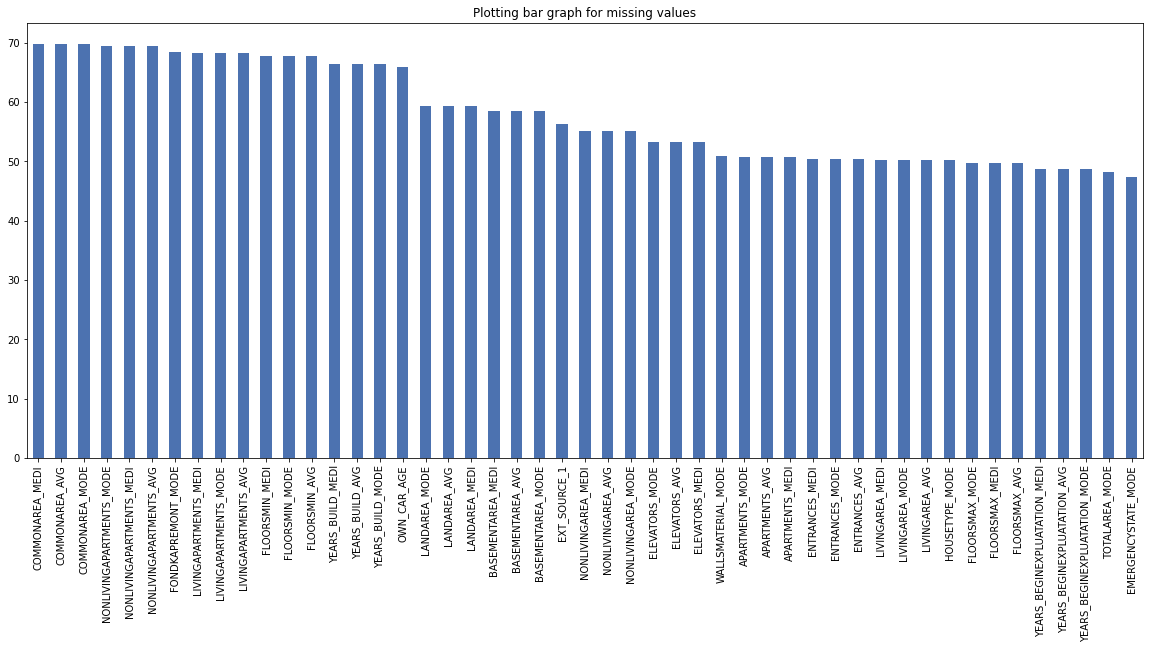

In [10]:
plt.figure(figsize=(20,8))
nulls_above_45.plot.bar();
plt.title("Plotting bar graph for missing values");

In [11]:
appl_data = appl_data.drop(labels = nulls_above_45.index, axis = 1)
appl_data.shape

(307511, 73)

In [12]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [13]:
#We don't have much information about what the documents(FLAG_DOCUMENT_*) are. So we will not be able to perform analysis on them. 
#Dropping these and other unwanted columns
# dropping columns   'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
               #   'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
               # 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE' 
dropping_columns=['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                  'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                  'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                  'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [14]:
#drop unimportant columns 
appl_data.drop(labels=dropping_columns,axis=1,inplace=True)

In [15]:
appl_data.shape

(307511, 45)

In [16]:
# show the columns which has missing values > 0%, all values are in percentage
nulls = ((appl_data.isna().sum()/row_count)*100).sort_values(ascending = False)
appl_data_missing = nulls[(nulls<45) & (nulls>0)]
appl_data_missing

OCCUPATION_TYPE              31.3455
EXT_SOURCE_3                 19.8253
AMT_REQ_CREDIT_BUREAU_YEAR   13.5016
AMT_REQ_CREDIT_BUREAU_QRT    13.5016
AMT_REQ_CREDIT_BUREAU_MON    13.5016
AMT_REQ_CREDIT_BUREAU_WEEK   13.5016
AMT_REQ_CREDIT_BUREAU_DAY    13.5016
AMT_REQ_CREDIT_BUREAU_HOUR   13.5016
NAME_TYPE_SUITE               0.4201
EXT_SOURCE_2                  0.2146
AMT_GOODS_PRICE               0.0904
AMT_ANNUITY                   0.0039
CNT_FAM_MEMBERS               0.0007
DAYS_LAST_PHONE_CHANGE        0.0003
dtype: float64

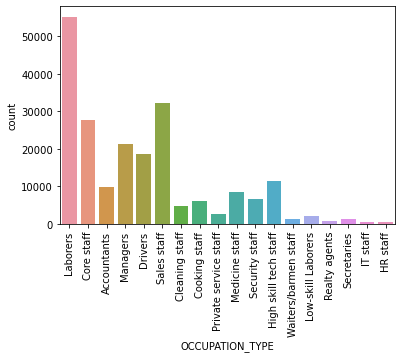

In [17]:
# treating the missing values
plt.xticks(rotation=90)
sns.countplot(x='OCCUPATION_TYPE', data=appl_data);

#### We see the largest category of OCCUPATION_TYPE is Laborers. It wouldn't be logical to replace the 31% missing values with Laborers. Replacing it with a new category 'Unknown'.

In [18]:
appl_data['OCCUPATION_TYPE'] = appl_data['OCCUPATION_TYPE'].fillna("Unknown")
appl_data['OCCUPATION_TYPE'].isna().sum()

0

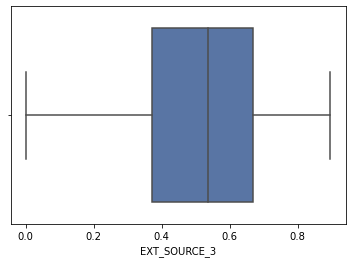

In [19]:
sns.boxplot(appl_data['EXT_SOURCE_3'])

In [20]:
#We can replace the missing values with mean since there are no outliers
appl_data['EXT_SOURCE_3']=appl_data['EXT_SOURCE_3'].fillna(appl_data['EXT_SOURCE_3'].mean());

In [21]:
cols_tocheck = ['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

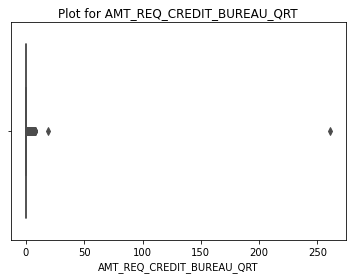

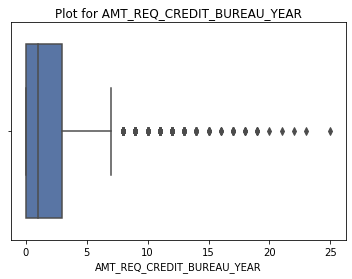

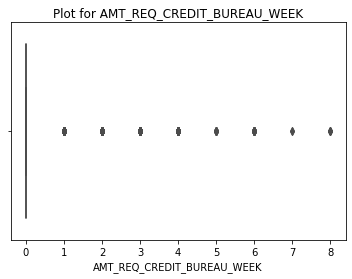

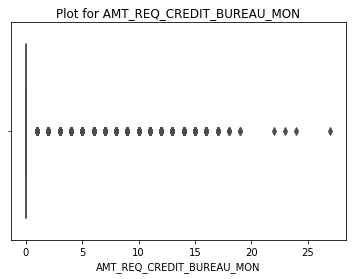

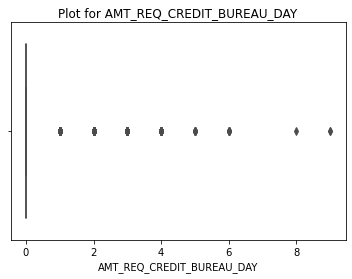

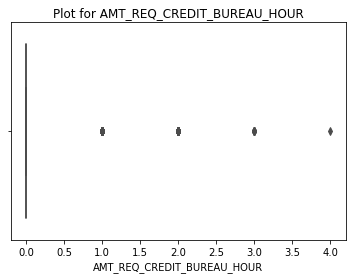

In [22]:
for column in cols_tocheck:
    sns.boxplot(appl_data[column])
    plt.title("Plot for "+ column)
    plt.show()

#### Due to the outliers, we fill the missing values in these columns with their mode

In [23]:
print(appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
appl_data['AMT_REQ_CREDIT_BUREAU_QRT']=appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

0.0


In [24]:
# Check if distrbution is bimodal
print(appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())
print(appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
print(appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print(appl_data['AMT_REQ_CREDIT_BUREAU_MON'].mode())

0   0.0000
dtype: float64
0   0.0000
dtype: float64
0   0.0000
dtype: float64
0   0.0000
dtype: float64
0   0.0000
dtype: float64


In [25]:
appl_data['AMT_REQ_CREDIT_BUREAU_DAY']=appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
appl_data['AMT_REQ_CREDIT_BUREAU_HOUR']=appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
appl_data['AMT_REQ_CREDIT_BUREAU_MON']=appl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
appl_data['AMT_REQ_CREDIT_BUREAU_WEEK']=appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
appl_data['AMT_REQ_CREDIT_BUREAU_YEAR']=appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

In [26]:
nulls = ((appl_data.isna().sum()/row_count)*100).sort_values(ascending = False)
nulls = nulls[nulls > 0]
nulls

NAME_TYPE_SUITE          0.4201
EXT_SOURCE_2             0.2146
AMT_GOODS_PRICE          0.0904
AMT_ANNUITY              0.0039
CNT_FAM_MEMBERS          0.0007
DAYS_LAST_PHONE_CHANGE   0.0003
dtype: float64

#### NAME_TYPE_SUITE is a categorical variable containing data about who accompanied the applicant. We can replace the missing values with the mode of the column

In [27]:
appl_data.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [28]:
appl_data.NAME_TYPE_SUITE=appl_data['NAME_TYPE_SUITE'].fillna(appl_data['NAME_TYPE_SUITE'].mode()[0])

In [29]:
appl_data.NAME_TYPE_SUITE.isna().sum()

0

In [30]:
nulls = ((appl_data.isna().sum()/row_count)*100).sort_values(ascending = False)
nulls = nulls[nulls > 0]
nulls

EXT_SOURCE_2             0.2146
AMT_GOODS_PRICE          0.0904
AMT_ANNUITY              0.0039
CNT_FAM_MEMBERS          0.0007
DAYS_LAST_PHONE_CHANGE   0.0003
dtype: float64

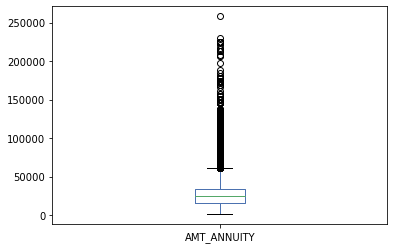

In [31]:
appl_data.AMT_ANNUITY.plot.box();

In [32]:
#Due to the outliers, we replace the missing values with median
appl_data['AMT_ANNUITY']=appl_data['AMT_ANNUITY'].fillna(appl_data['AMT_ANNUITY'].median())

In [33]:
appl_data.AMT_ANNUITY.isna().sum()

0

In [34]:
null_values=appl_data.isna().sum()

In [35]:
appl_data.EXT_SOURCE_2.isna().sum()

660

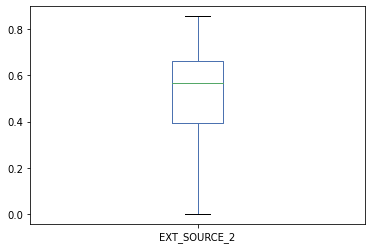

In [36]:
appl_data.EXT_SOURCE_2.plot.box();

In [37]:
#since there are no outliers, we can replace the missing values with mean
appl_data['EXT_SOURCE_2']=appl_data['EXT_SOURCE_2'].fillna(appl_data['EXT_SOURCE_2'].mean())

In [38]:
appl_data['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

In [39]:
appl_data['DAYS_LAST_PHONE_CHANGE'].isna().mode()

0    False
dtype: bool

In [40]:
appl_data['DAYS_LAST_PHONE_CHANGE']=appl_data['DAYS_LAST_PHONE_CHANGE'].fillna(appl_data['DAYS_LAST_PHONE_CHANGE'].mode()[0])

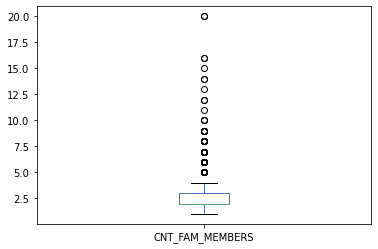

In [41]:
appl_data.CNT_FAM_MEMBERS.plot.box()

In [42]:
#replacing missing values with median due to the outliers seen in boxplot
appl_data['CNT_FAM_MEMBERS']=appl_data['CNT_FAM_MEMBERS'].fillna(appl_data['CNT_FAM_MEMBERS'].median())

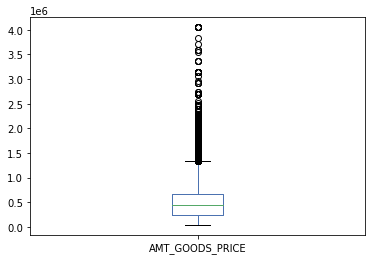

In [43]:
appl_data.AMT_GOODS_PRICE.plot.box();

In [44]:
appl_data['AMT_GOODS_PRICE']=appl_data['AMT_GOODS_PRICE'].fillna(appl_data['AMT_GOODS_PRICE'].median())

In [45]:
null_after_imputing = appl_data.isna().sum()
null_after_imputing [null_after_imputing >0]

Series([], dtype: int64)

In [46]:
((appl_data.isna().sum()/row_count)*100).sort_values(ascending = False)


AMT_REQ_CREDIT_BUREAU_YEAR    0.0000
FLAG_MOBIL                    0.0000
DAYS_REGISTRATION             0.0000
DAYS_EMPLOYED                 0.0000
DAYS_BIRTH                    0.0000
REGION_POPULATION_RELATIVE    0.0000
NAME_HOUSING_TYPE             0.0000
NAME_FAMILY_STATUS            0.0000
NAME_EDUCATION_TYPE           0.0000
NAME_INCOME_TYPE              0.0000
NAME_TYPE_SUITE               0.0000
AMT_GOODS_PRICE               0.0000
AMT_ANNUITY                   0.0000
AMT_CREDIT                    0.0000
AMT_INCOME_TOTAL              0.0000
CNT_CHILDREN                  0.0000
FLAG_OWN_REALTY               0.0000
FLAG_OWN_CAR                  0.0000
CODE_GENDER                   0.0000
NAME_CONTRACT_TYPE            0.0000
TARGET                        0.0000
DAYS_ID_PUBLISH               0.0000
FLAG_CONT_MOBILE              0.0000
AMT_REQ_CREDIT_BUREAU_QRT     0.0000
OCCUPATION_TYPE               0.0000
AMT_REQ_CREDIT_BUREAU_MON     0.0000
AMT_REQ_CREDIT_BUREAU_WEEK    0.0000
A

#### We have now removed all the missing values(NaN). We will check the dataset for missing values that are not stored as NaN but rather as random values such as N/A, X etc.

In [47]:
appl_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [48]:
# replacing the XNA values which indiactes "NOT AVAILABLE" with UNKNOWN
appl_data['ORGANIZATION_TYPE'].replace("XNA","Unknown",inplace=True,)
appl_data[appl_data.ORGANIZATION_TYPE == "XNA"].shape

(0, 45)

In [49]:
appl_data[appl_data.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0000,382500.0000,19125.0000,337500.0000,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.0207,-20232,-10044,-10024.0000,-3537,1,1,Unknown,2.0000,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.2960,0.4615,-286.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0000,270000.0000,13500.0000,225000.0000,Family,Working,Secondary / secondary special,Married,House / apartment,0.0264,-13717,-2797,-2241.0000,-4659,1,1,Low-skill Laborers,4.0000,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.7092,0.3108,-493.0000,0.0000,0.0000,0.0000,3.0000,0.0000,4.0000
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0000,405000.0000,20250.0000,225000.0000,Unaccompanied,Working,Higher education,Married,House / apartment,0.0358,-10647,-1228,-183.0000,-1671,1,1,Core staff,3.0000,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.6592,0.0770,-851.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0000,540000.0000,27000.0000,900000.0000,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.0358,-9649,-2293,-4099.0000,-2326,1,1,Unknown,2.0000,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.6586,0.3606,-1681.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000


In [50]:
appl_data.CODE_GENDER.value_counts(normalize=True)

F     0.6583
M     0.3416
XNA   0.0000
Name: CODE_GENDER, dtype: float64

In [51]:
appl_data['CODE_GENDER'].mode()[0]

'F'

In [52]:
appl_data.loc[appl_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
appl_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Treating negative values

In [53]:
#Treating the negative values in the columns'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'
appl_data['DAYS_BIRTH']  = abs(appl_data['DAYS_BIRTH'] )
appl_data['DAYS_EMPLOYED'] = abs(appl_data['DAYS_EMPLOYED'] )
appl_data['DAYS_REGISTRATION'] = abs(appl_data['DAYS_REGISTRATION'] )
appl_data['DAYS_ID_PUBLISH'] = abs(appl_data['DAYS_ID_PUBLISH'] )

In [54]:
appl_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0000,2120
1,16765,1188,1186.0000,291
2,19046,225,4260.0000,2531
3,19005,3039,9833.0000,2437
4,19932,3038,4311.0000,3458
...,...,...,...,...
307506,9327,236,8456.0000,1982
307507,20775,365243,4388.0000,4090
307508,14966,7921,6737.0000,5150
307509,11961,4786,2562.0000,931


## 4. Checking for Outlier 

* Approaches followed to treat outliers:

  >  * Removing outliers
   >  * Cap/floor the outlier - Performed capping and flooring based on the skewness of the data. This method is preferred when we                             have a lot of columns to be treated for outliers. We have built a function to reuse for every column.                           This converts the skewed data to normal distribution and ensure our analysis is not impacted by extreme                         values 

  



In [55]:
appl_numerical  = appl_data.select_dtypes(include=['int64','float64']).columns
appl_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

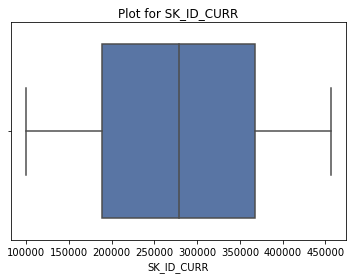

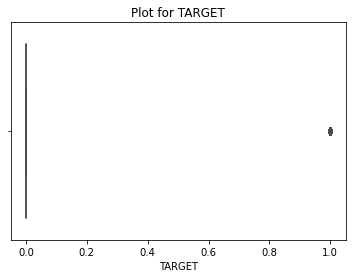

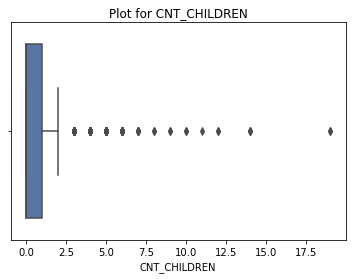

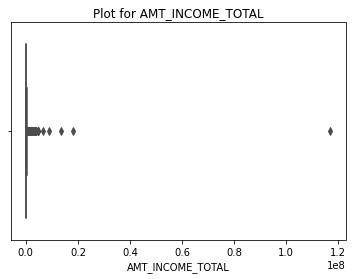

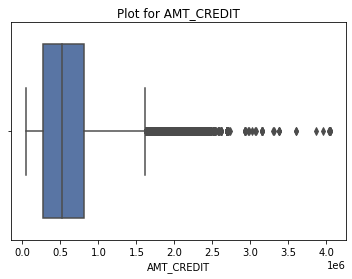

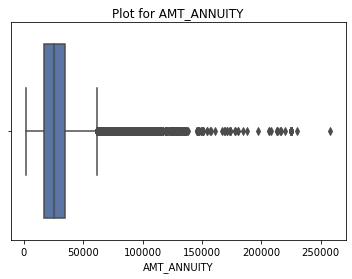

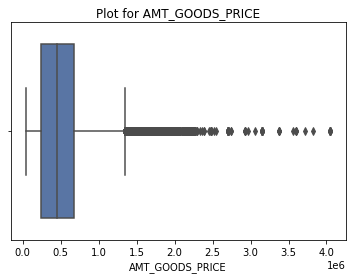

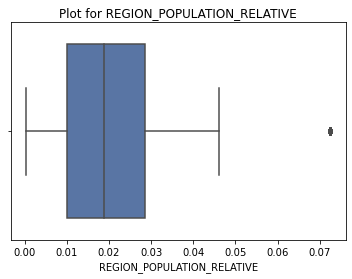

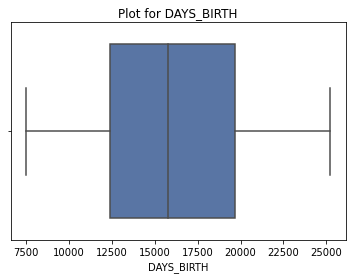

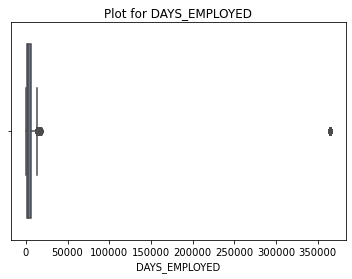

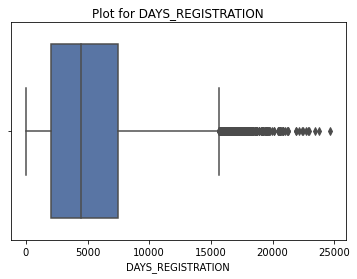

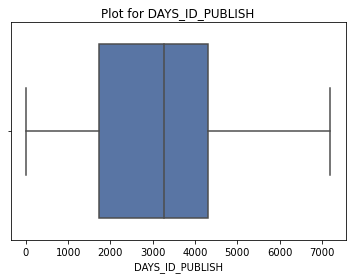

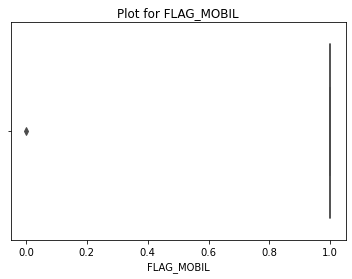

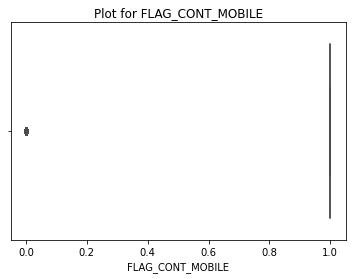

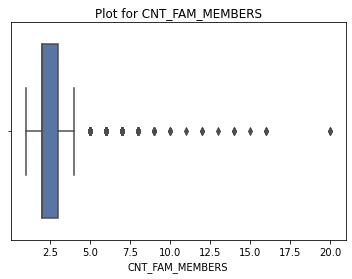

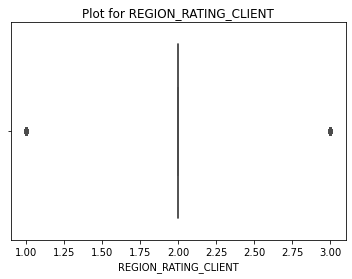

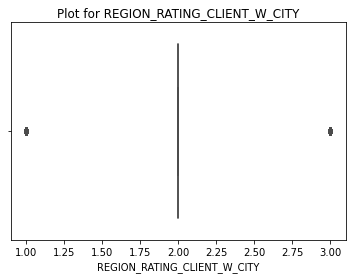

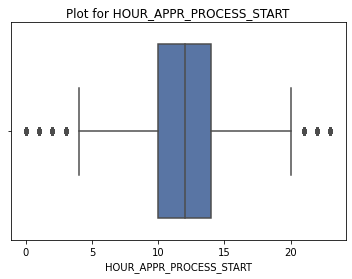

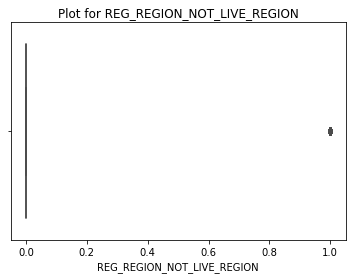

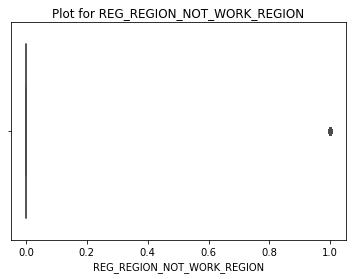

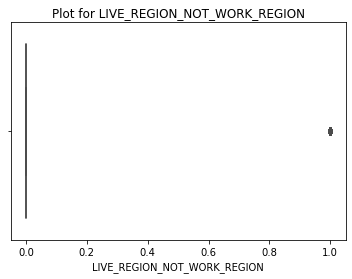

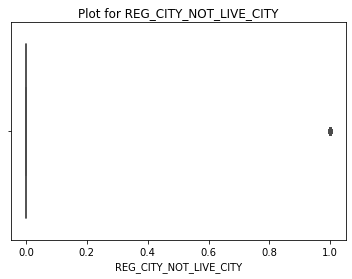

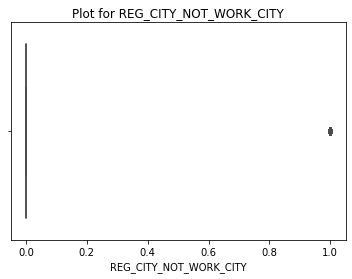

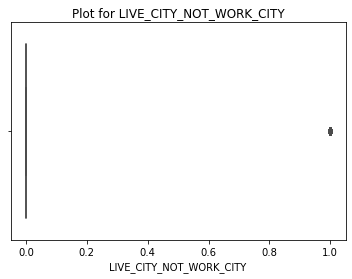

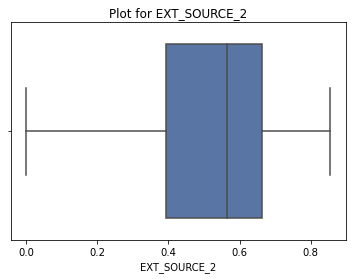

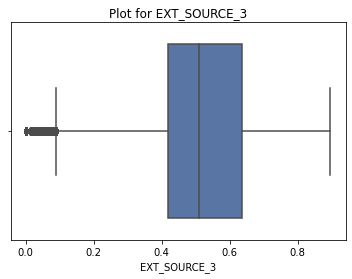

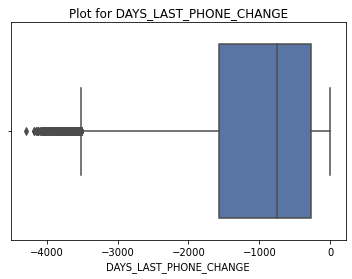

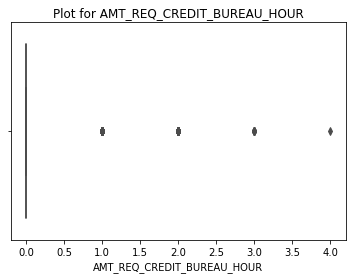

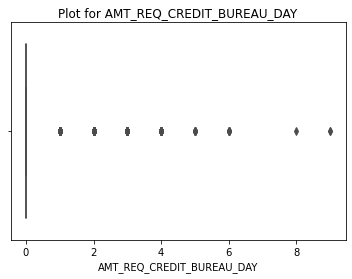

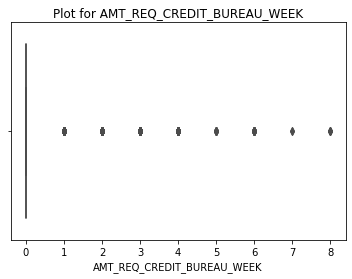

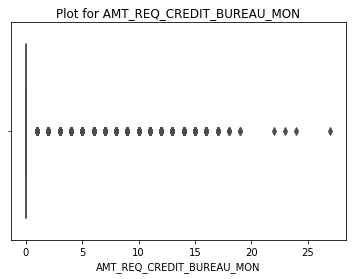

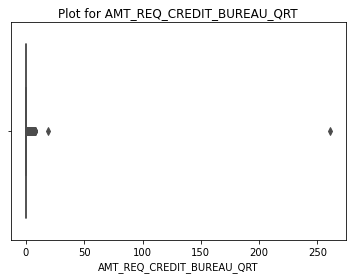

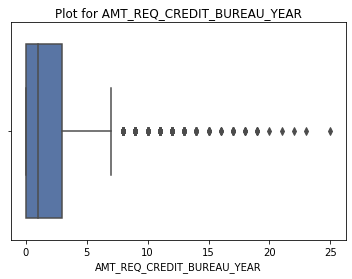

In [56]:
#Outliers - using box plot

for column in appl_numerical:
    sns.boxplot(appl_data[column])
    plt.title("Plot for "+ column)
    plt.show()


## 4.1. Handling outliers - Removal

#### We see there are outliers in the column CNT_CHILDREN, as seen in below boxplot

Text(0.5, 1.0, 'Boxplot for CNT_CHILDREN')

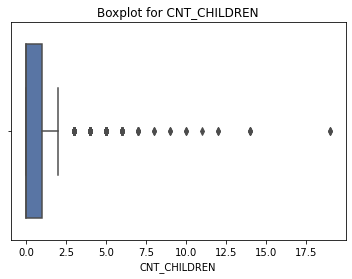

In [57]:
sns.boxplot(appl_data['CNT_CHILDREN']);
plt.title("Boxplot for CNT_CHILDREN")

In [58]:
print(appl_data[appl_data['CNT_CHILDREN'] >= 4].shape)
appl_data['CNT_CHILDREN'].describe()

(555, 45)


count   307511.0000
mean         0.4171
std          0.7221
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

It is extremely rare to have more than 4-5 children today's times where even 4 rare. We can drop these rows since there are just 555 rows and wouldn't impact much

In [59]:
#removing outliers
appl_data = appl_data[appl_data['CNT_CHILDREN'] < 4]

## 4.2  Handling outliers - Capping and Flooring

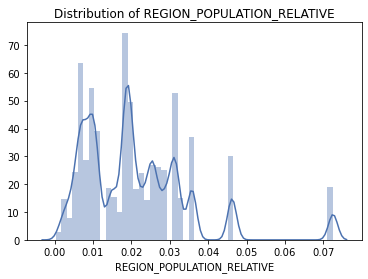

In [60]:
sns.distplot(appl_data['REGION_POPULATION_RELATIVE']);
plt.title("Distribution of REGION_POPULATION_RELATIVE");

#### For the rest of the columns, the disribution is skewed(we can see an example above). We can perform capping and flooring based on the skewness of the data. We will build a function to reuse for every column. This converts the skewed data to normal distribution and ensure our analysis is not impacted by extreme values.

In [61]:
def cap_floor_outlier(df,column,cap,floor,cvalue=0.9,fvalue=0.1):
    qvalue_c = df[column].quantile(cvalue)
    qvalue_f = df[column].quantile(fvalue)
    
    if cap:
        df[column] = np.where(df[column] > qvalue_c, qvalue_c,appl_data[column])
    if floor:
        df[column] = np.where(df[column] < qvalue_f, qvalue_f,appl_data[column])


In [62]:
#Capping and flooring outliers in selected columns based on the skewness observed in the boxplots above
cap_floor_outlier(df=appl_data,column='REGION_POPULATION_RELATIVE',cap=True,floor=False,cvalue=0.9)
cap_floor_outlier(df=appl_data,column='AMT_CREDIT',cap=True,floor=False,cvalue=0.95)
cap_floor_outlier(df=appl_data,column='AMT_ANNUITY',cap=True,floor=False,cvalue=0.9)
cap_floor_outlier(df=appl_data,column='AMT_INCOME_TOTAL',cap=True,floor=False,cvalue=0.99)
cap_floor_outlier(df=appl_data,column='AMT_GOODS_PRICE',cap=True,floor=False,cvalue=0.9)
cap_floor_outlier(df=appl_data,column='DAYS_REGISTRATION',cap=True,floor=False,cvalue=0.9)
cap_floor_outlier(df=appl_data,column='DAYS_EMPLOYED',cap=True,floor=False,cvalue=0.8)
cap_floor_outlier(df=appl_data,column='CNT_FAM_MEMBERS',cap=True,floor=False,cvalue=0.95)
cap_floor_outlier(df=appl_data,column='HOUR_APPR_PROCESS_START',cap=True,floor=True,cvalue=0.9,fvalue=0.1)
cap_floor_outlier(df=appl_data,column='EXT_SOURCE_3',cap=False,floor=True,fvalue=0.1)

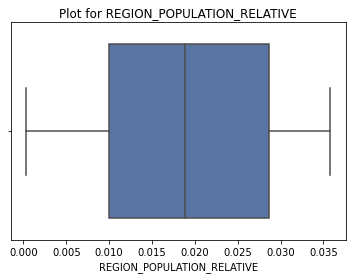

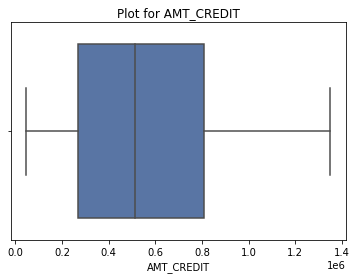

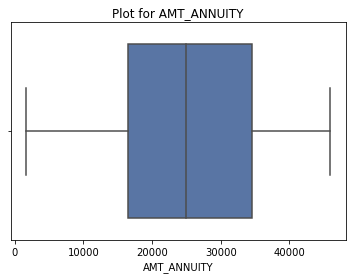

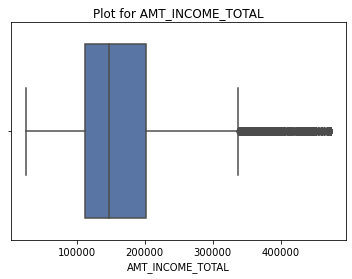

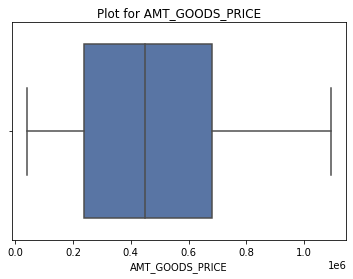

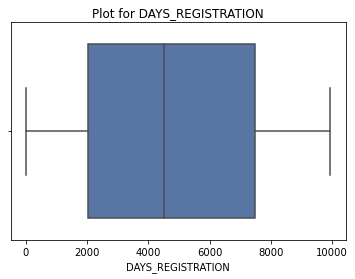

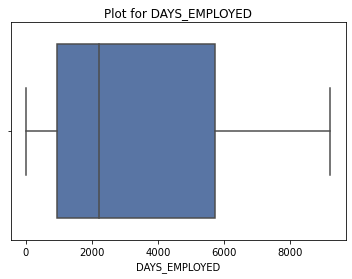

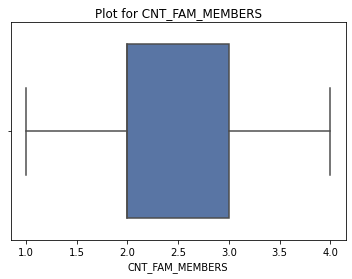

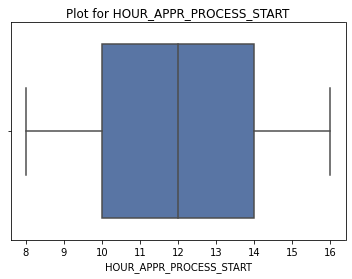

In [63]:
treated_columns = ['REGION_POPULATION_RELATIVE','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE',
                   'DAYS_REGISTRATION','DAYS_EMPLOYED','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START']
#check if outliers have been handled
for column in treated_columns:
    sns.boxplot(appl_data[column])
    plt.title("Plot for "+ column)
    plt.show()

## 5. Derived Variables

#### We can make use of the column 'DAYS_BIRTH' to create age groups and store it as a new column

In [64]:
#converting age in days to years considering leap year
appl_data['AGE_YEARS'] = appl_data['DAYS_BIRTH'] // 365.25 
appl_data['AGE_YEARS'].describe()

count   306956.0000
mean        43.4144
std         11.9513
min         20.0000
25%         33.0000
50%         43.0000
75%         53.0000
max         69.0000
Name: AGE_YEARS, dtype: float64

In [65]:
#removing days_birth as we have the same data in years
appl_data.drop(['DAYS_BIRTH'],inplace=True,axis=1)
appl_data.shape

(306956, 45)

In [66]:
appl_data['AGE_GROUP'] = pd.cut(appl_data['AGE_YEARS'],bins=np.linspace(20 ,70,num=6))
appl_data['AGE_GROUP'].value_counts(normalize=True)

(30.0, 40.0]   0.2700
(40.0, 50.0]   0.2418
(50.0, 60.0]   0.2210
(20.0, 30.0]   0.1724
(60.0, 70.0]   0.0949
Name: AGE_GROUP, dtype: float64

#### Deriving years spent by applicant in the current employment using the column DAYS_EMPLOYED. We will drop this columns once we derive the same in years

In [67]:
#converting days to years considering leap year for the column days_employed
appl_data['YEARS_EMPLOYED'] = appl_data['DAYS_EMPLOYED'] // 365.25 
#removing days_birth as we have the same data in years
appl_data.drop(['DAYS_EMPLOYED'],inplace=True,axis=1)
appl_data.shape

(306956, 46)

#### We can create income brackets using the column AMT_INCOME_TOTAL.

In [68]:
appl_data['AMT_INCOME_TOTAL'].describe()

count   306956.0000
mean    166023.8490
std      83046.9280
min      25650.0000
25%     112500.0000
50%     147600.0000
75%     202500.0000
max     472500.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
appl_data['INCOME_BRACKET'] = pd.qcut(appl_data['AMT_INCOME_TOTAL'], [0.2, 0.4, 0.6, 0.8, 1], ["Low","Medium","High","Very High"])
appl_data['INCOME_BRACKET'].value_counts()

Low          89221
High         75386
Very High    47033
Medium       35388
Name: INCOME_BRACKET, dtype: int64

## 5.1 Univariate analysis using dervied variables

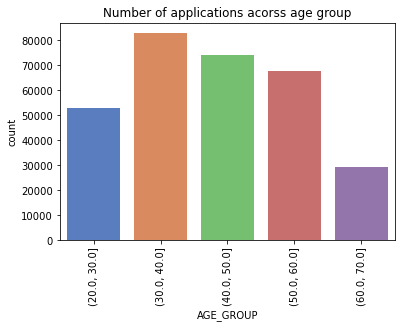

In [70]:
#univariate - Analysis of AGE_GROUP derived of applicants
sns.countplot(appl_data['AGE_GROUP'],palette = "muted");
plt.title("Number of applications acorss age group")
plt.xticks(rotation=90);

<b> 
  - We notice that the highest number of applicants are from the 30-40 age group
  - The lowest number of applicants are from 60+ age group
</b>

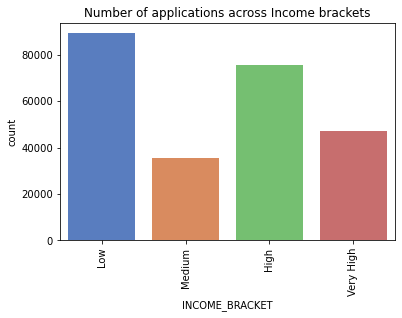

In [71]:
# univariate analysis on INCOME_BRACKET derived variable
sns.countplot(appl_data['INCOME_BRACKET'],palette="muted");
plt.title("Number of applications across Income brackets")
plt.xticks(rotation=90);

<b>
    
- The highest number of applications are from the low income bracket.
- The lowest number of applications are from the medium income bracket.
    
</b>

## 6. Data Imbalance check in Target variable

In [72]:
appl_data['TARGET'].value_counts()

0    282202
1     24754
Name: TARGET, dtype: int64

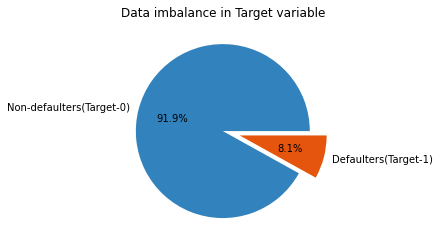

In [73]:
# Plotting pie chart for data imbalance
explode = (0,0.2)
labels = "Non-defaulters(Target-0)","Defaulters(Target-1)"
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(appl_data['TARGET'].value_counts(normalize=True),explode=explode,labels = labels,autopct='%1.1f%%',colors=outer_colors);
plt.title("Data imbalance in Target variable");

### We see that the target variable has high data imbalance with 91.9% non defaulters and 8.1% defaulters.  So we will seperate the data set into two categories and perform further analysis.

### 6.1  Ratio of Imbalance

In [74]:
#checking imbalance
(appl_data['TARGET']==0).sum() / (appl_data['TARGET']==1).sum()

11.400258544073685

In [75]:
#  client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
# defaulters

(appl_data['TARGET']==1).sum()

24754

In [76]:
#  all other cases,who pay on time

(appl_data['TARGET']==0).sum()

282202

### 6.2 Modelling would be challenging where data is imbalanced , hence we can seperate target 1 and target 0 and then we can analyse if there is any relationship

In [77]:
# segregating target 1 and target 0
target_0=appl_data.loc[appl_data['TARGET']==0]
target_1=appl_data.loc[appl_data['TARGET']==1]


In [78]:
print(target_0.shape)
print(target_1.shape)

(282202, 47)
(24754, 47)


## 7. Univariate Analysis

## 7.1 Univariate Analysis for categorical variables with respect to Target 0 and 1

In [79]:
# categorical colums
appl_data.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [80]:
#selecting variables for univariate categorical analysis for target 1 and target 0
appl_data_categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START']

In [81]:
# function for plotting pie chart and bar graph in terms of percentage
def plotting_pie_perc(appl_data, target0, target1, column):
    
    appl_data = appl_data
    target_0 = target0
    target_1 = target1
    col = column
    
    fig  = plt.figure(figsize=[14,6])
    
    ax1 = plt.subplot(1,2,1)
    wedges, texts, autotexts = ax1.pie(appl_data[col].value_counts(),autopct = "%1.0f%%",wedgeprops=dict(width=0.5),pctdistance=1.1, labeldistance=1.2)
    plt.title("Plotting data for column:" +column)
    ax1.legend(wedges, appl_data[col].value_counts().index,
          title="col",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    ax2 = plt.subplot(1,2,2)
    df = pd.DataFrame()
    df['Target-0'] = ((target_0[col].value_counts())/len(target_0))
    df['Target-1'] = ((target_1[col].value_counts())/len(target_1))
    df.plot.bar(ax=ax2)
    plt.title("Plotting data for target in terms of percentage")
    
    fig.tight_layout()
    
    plt.show()
    
    

Plotting NAME_CONTRACT_TYPE


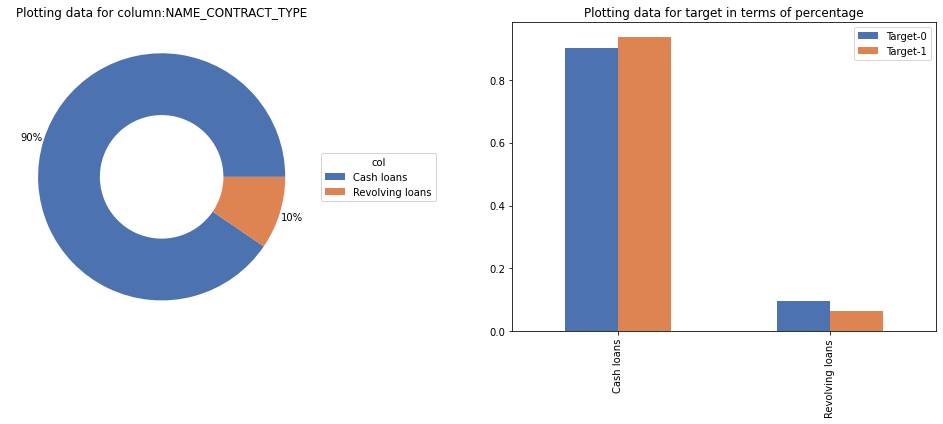

Plotting CODE_GENDER


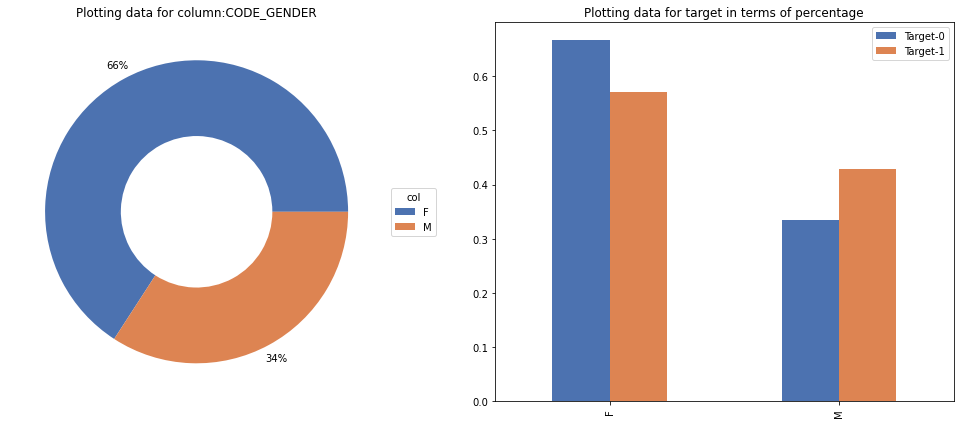

Plotting FLAG_OWN_CAR


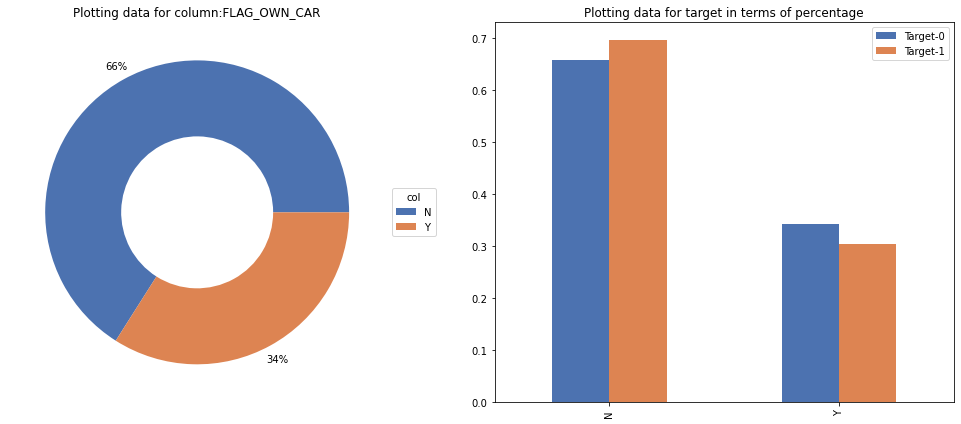

Plotting FLAG_OWN_REALTY


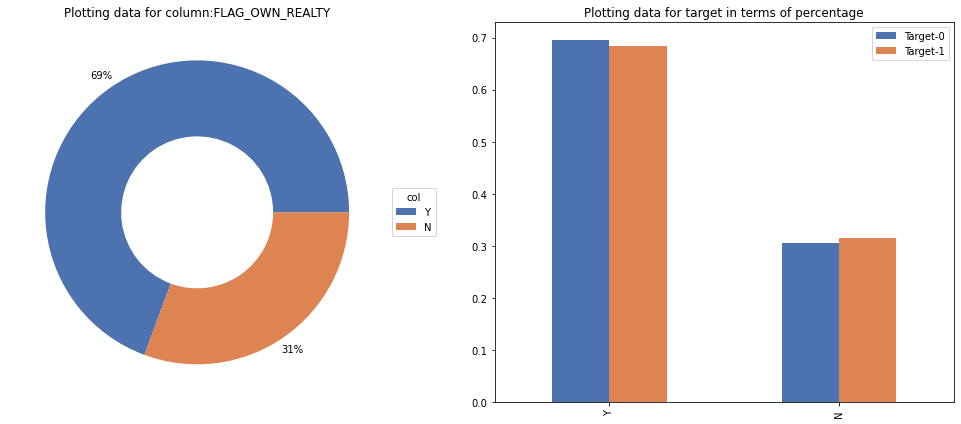

Plotting NAME_TYPE_SUITE


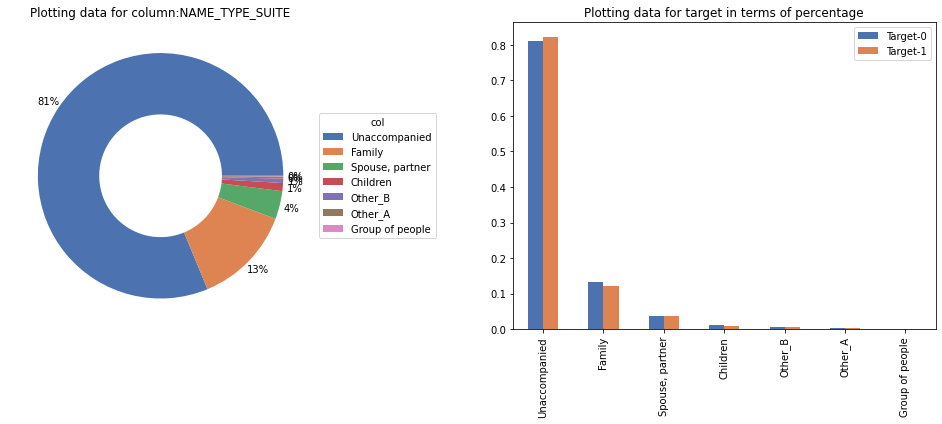

Plotting NAME_INCOME_TYPE


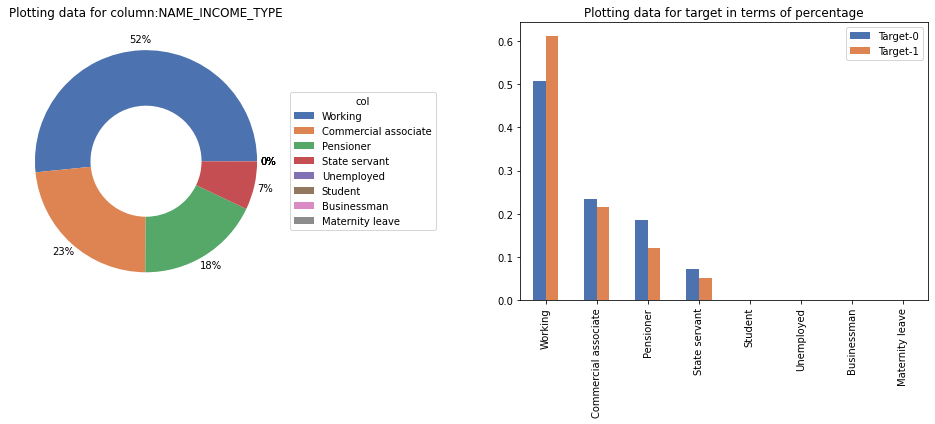

Plotting NAME_EDUCATION_TYPE


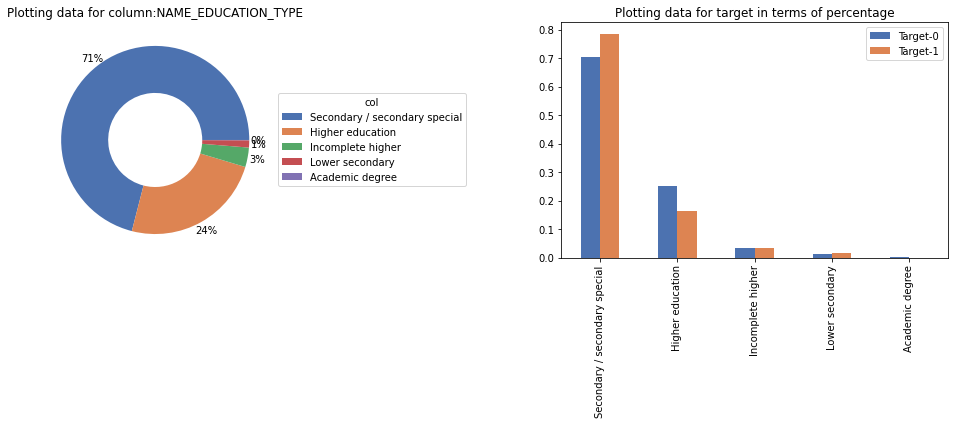

Plotting NAME_FAMILY_STATUS


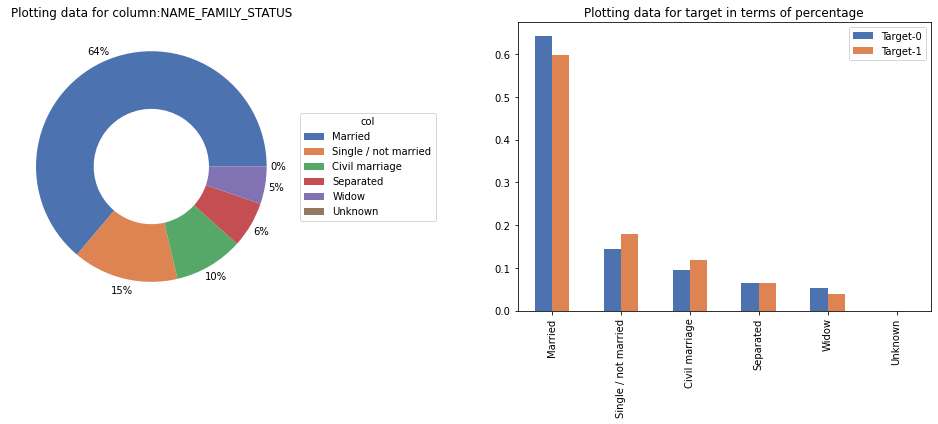

Plotting NAME_HOUSING_TYPE


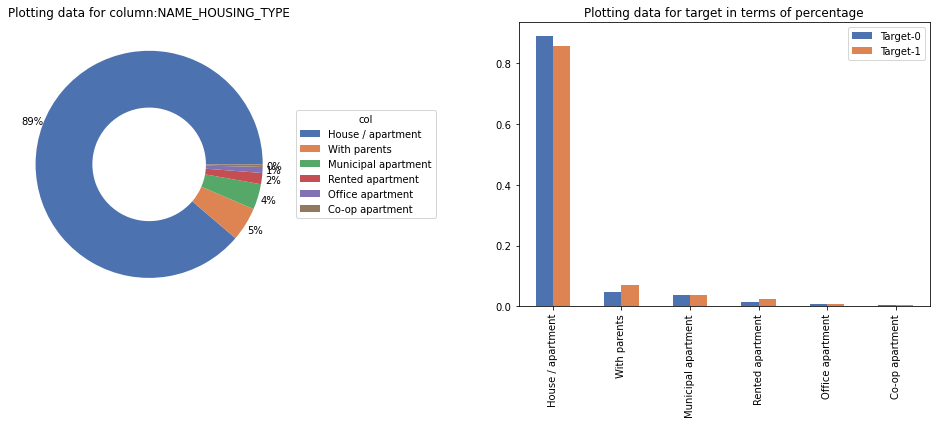

Plotting OCCUPATION_TYPE


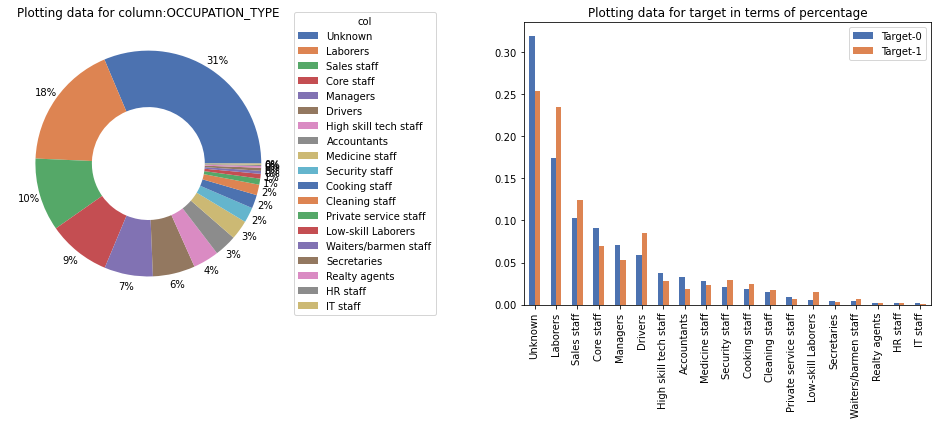

Plotting WEEKDAY_APPR_PROCESS_START


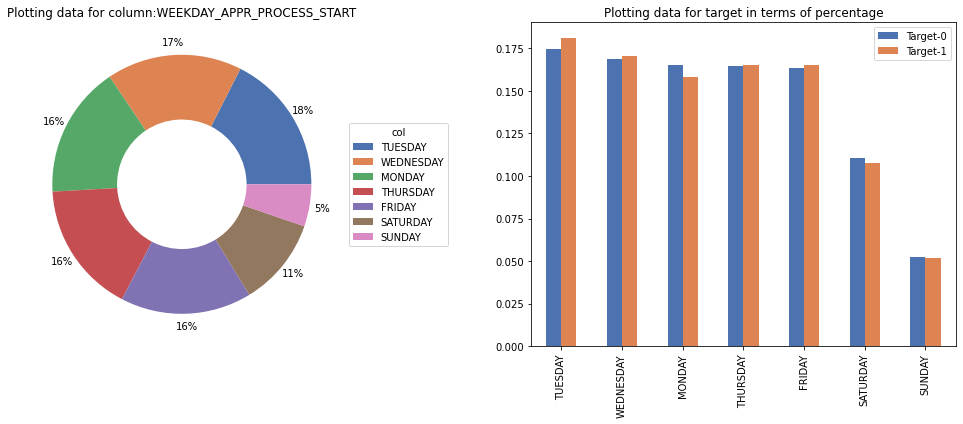

In [82]:
# Analysis for categorical data 
#Univariate & segmented univariate categorical variables with target)
for column in appl_data_categorical:
    print("Plotting", column)
    plotting_pie_perc(appl_data, target_0, target_1, column)

# Inferences 

<b>
    
1.  NAME_CONTRACT_TYPE - While majority of the applications are for Cash loans, the applicants of revolving loans are more punctual in making payments.
2. CODE_ GENDER - females have applied for more loan compared to males, also females pay loan punctually compared to males
3.  FLAG_OWN_CAR - majority of applicants don't own a car. The number of people having difficulty are higher than punctual payers in this group
 FLAG_OWN_REALTY - people who own a house or flat have applied for more loan. But among the applicants who don't own realty, the percentage of defaulters is slightly higher.
- NAME_INCOME_TYPE - Clients from working class apply for loan more than the clients of other income type. The working class also has more difficulty in making payments on time.
- OCCUPATION_TYPE - Apart from the newly introduced category 'Unknown', Laborers have applied most for the loan and are also mostly defaulters.
- NAME_FAMILY_STATUS – Clients who are married apply for loan more than the clients of other family status. Also, married clients are more punctual in paying loans


</b>

## 7.2  Univariate Analysis for Numerical Columns wrt to target 0 and target 1

In [83]:
# numerical columns
num_cols = appl_data.describe().columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_YEARS', 'YEARS_EMPLOYED'],
      dtype='object')

In [84]:
num_cols = ['YEARS_EMPLOYED',
       'EXT_SOURCE_2',
       'EXT_SOURCE_3','AGE_YEARS']

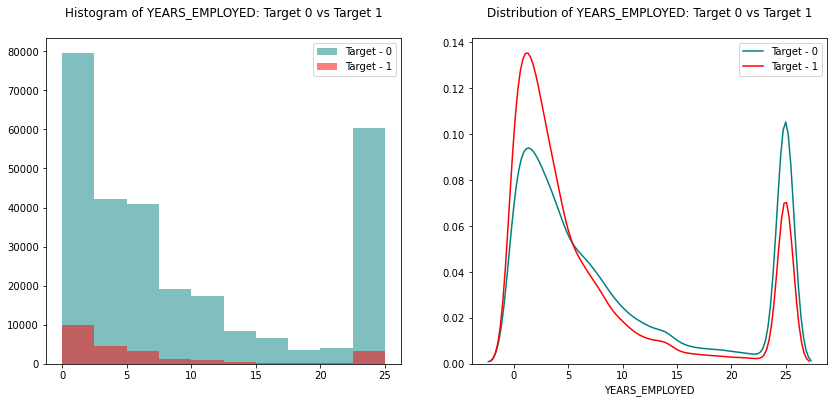

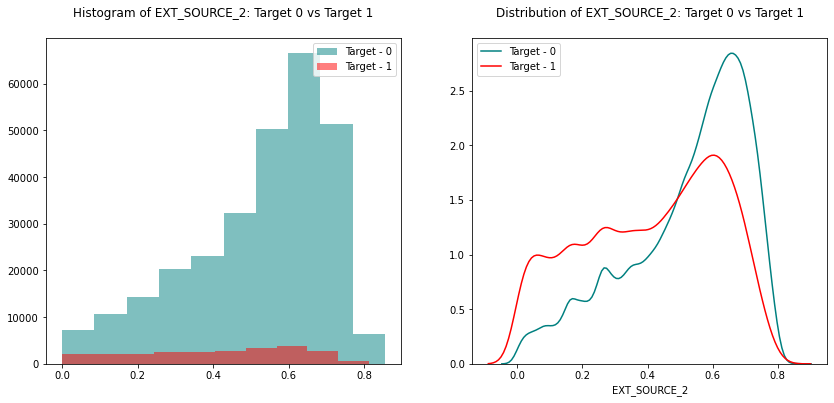

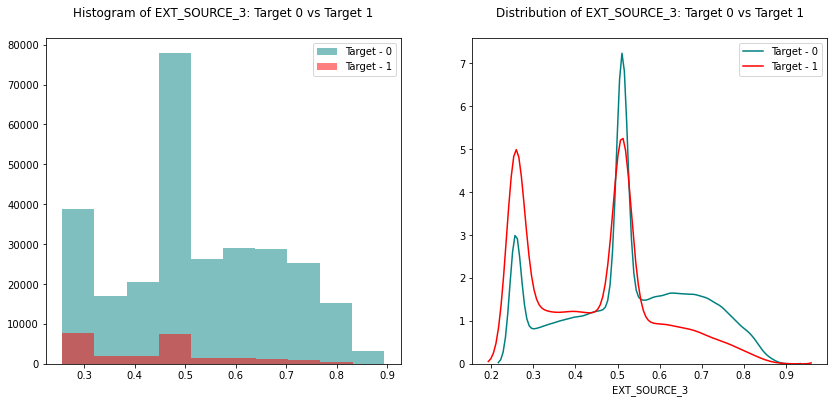

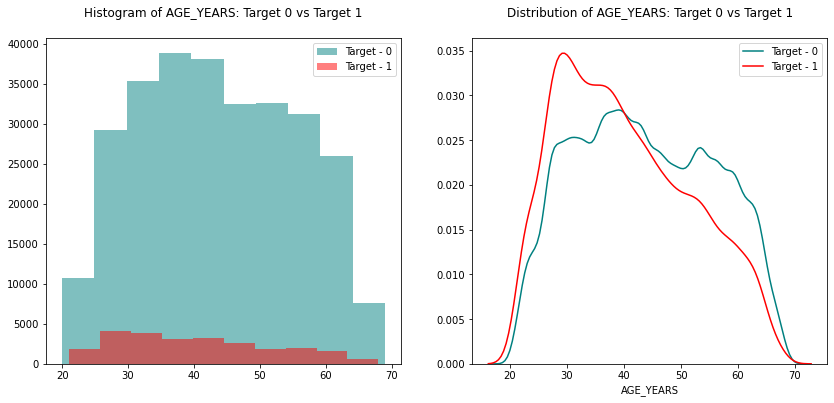

In [85]:
# plotting histogram and distribution plot for selected numerical columns
for column in num_cols:
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.hist(target_0[column], alpha=0.5,label = 'Target - 0',color="teal")
    plt.hist(target_1[column], alpha=0.5,label = 'Target - 1',color="red")
    plt.title("Histogram of "+ column + ": Target 0 vs Target 1\n")
    plt.legend(loc=1)

    
    plt.subplot(1,2,2)
    sns.distplot(target_0[column],hist=False,label = 'Target - 0',color="teal")
    sns.distplot(target_1[column],hist=False,label = 'Target - 1',color="red")
    plt.title("Distribution of "+ column + ": Target 0 vs Target 1\n")
    
    plt.show()

<b>

- EXT_SOURCE_2 :  This is the normalized score from an external source and we see higher number of defaulters in the lower scores.
- EXT_SOURCE_3 :  Here again, we see the number of defaulters is very high in the lower scores. Looking at the distribution of both target groups, we can conclude it is a very indicative score for the banks to take a decision on an individual.
- AGE_YEARS :  We can notice higher number of defaulters are concentrated towards the lower ages. Whereas the non-defaulters are spread across all age groups. We can hence consider the lower age groups risky.
- YEARS_EMPLOYED : The number of defaulters is higher among applicants who have been in the current employment between 2-5 years. More applicants who have been in the same company for 20-28 years make the payments on time.
 
    
</b>

## 8. Bivariate analysis for target 0 and target 1


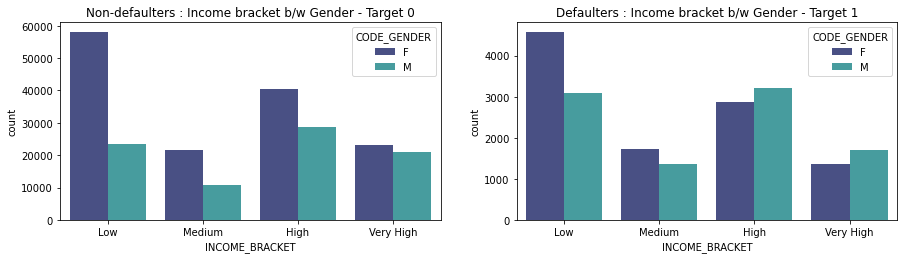

In [86]:
# countplot for income bracket vs gender 
plt.figure(figsize=(15,8))

hue_order = target_0['CODE_GENDER'].unique()

plt.subplot(2,2,1)
sns.countplot(x='INCOME_BRACKET', hue ='CODE_GENDER',data = target_0,hue_order=hue_order,palette = 'mako');
plt.title("Non-defaulters : Income bracket b/w Gender - Target 0");

plt.subplot(2,2,2)
sns.countplot(x='INCOME_BRACKET', hue ='CODE_GENDER',data = target_1,hue_order=hue_order,palette = 'mako');
plt.title("Defaulters : Income bracket b/w Gender - Target 1");

<b>
 
- Female
- Among the defaulters, number of females is higher than males in the Low and Medium income range. 
- In the high and very high range, more males than females are facing payment difficulties
    
</b>

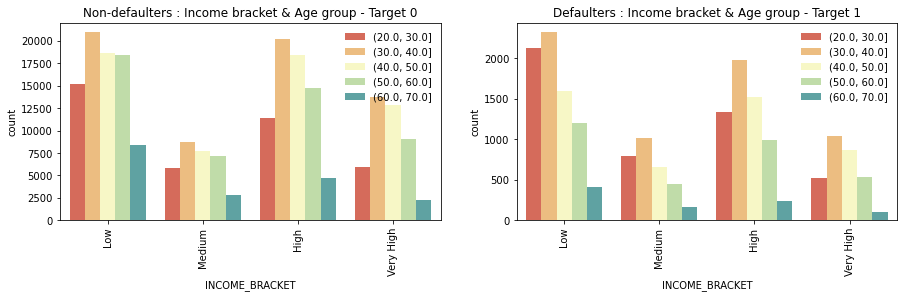

In [87]:
#countplot for income bracket vs age group
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.countplot(x='INCOME_BRACKET', hue ='AGE_GROUP',data = target_0,palette = 'Spectral');
plt.title("Non-defaulters : Income bracket & Age group - Target 0")
plt.xticks(rotation=90);
plt.legend(frameon=False);

plt.subplot(2,2,2)
sns.countplot(x='INCOME_BRACKET', hue ='AGE_GROUP',data = target_1,palette = 'Spectral');
plt.title("Defaulters : Income bracket & Age group - Target 1")
plt.xticks(rotation=90);
plt.legend(frameon=False);

<b>
    
- The number of defaulters in age group (30-40) is much higher than other age group across all income range. 
- The number of defaulters in age group (20-30) is second highest after (30-40) in the low and medium income range, whereas this age group is consistently second lowest before 60+ age group
- The difference between number of people in age group (30-40) and (40-50) is lesser in the non-defaulter population

</b>

## 9. Multivariate Analysis for  Target 1 and Target 0

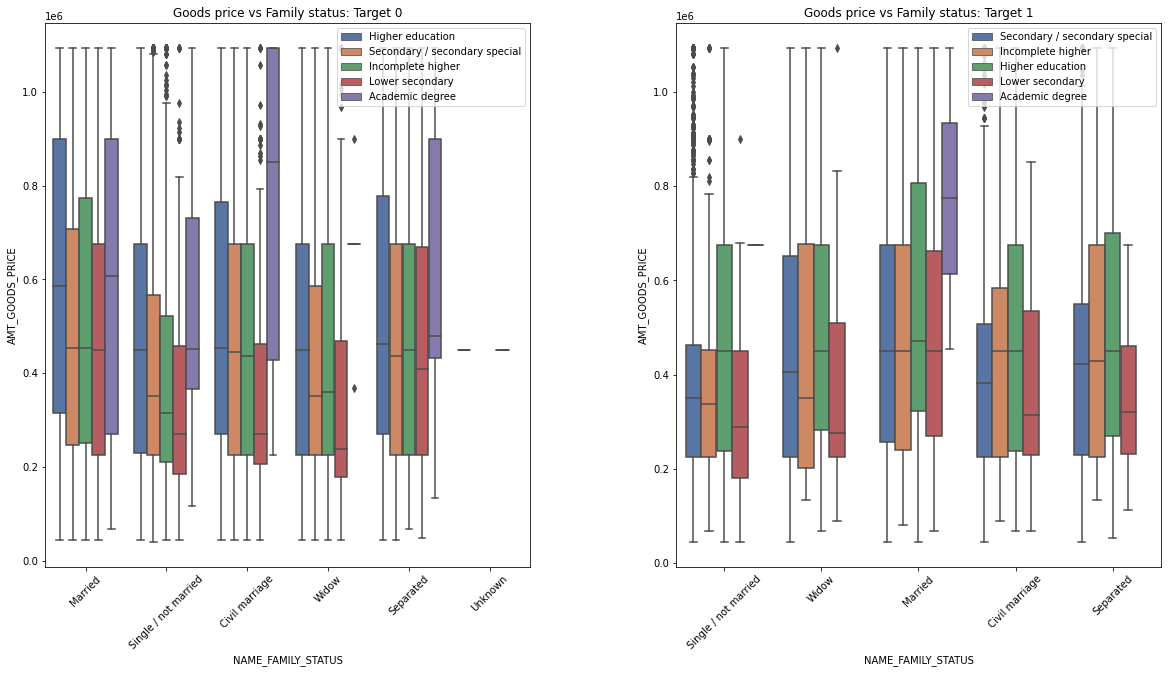

In [88]:
# Multivariate Analysis on target 0 and target 1-for goods price
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
plt.xticks(rotation=45)
sns.boxplot(data =target_0, x='NAME_FAMILY_STATUS',y='AMT_GOODS_PRICE', hue ='NAME_EDUCATION_TYPE',orient='v')
plt.title('Goods price vs Family status: Target 0')
plt.legend(loc=1)


plt.subplot(1,2,2)
plt.xticks(rotation=45)
sns.boxplot(data =target_1, x='NAME_FAMILY_STATUS',y='AMT_GOODS_PRICE', hue ='NAME_EDUCATION_TYPE',orient='v')
plt.title('Goods price vs Family status: Target 1')
plt.legend(loc=1)

plt.show()

<b>

- Chances of applicants with academic degree making payments on time is higher, especially when the amount of goods price is high for all family status. They are also the once who have the higest goods price in all education groups
- Applicants of family status single/not married applying for lower goods price have higher risk of defaulting
    


</b>

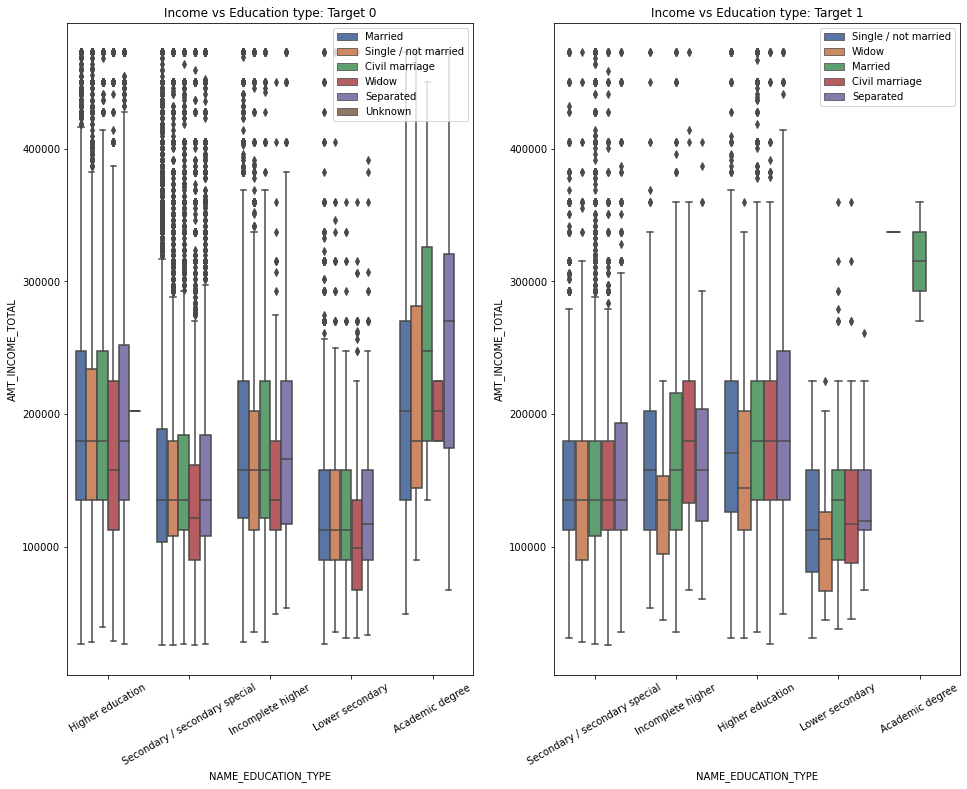

In [89]:
# Multivariate Analysis on target 0 and target 1- for income
plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
plt.xticks(rotation=30)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income vs Education type: Target 0')
plt.legend(loc=1)

plt.subplot(1,2,2)
plt.xticks(rotation=30)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income vs Education type: Target 1')
plt.legend(loc=1)
plt.show()

<b>

- Banks should avoid giving loans to applicants of single family status with low income and maximum education background of lower secondary
- People with Higher education and higher income are second most punctual after people with academic degree in making payments

</b>

## 10. Finding top 10 correlation for the target variables

###        Top 10 Correlation for Target = 0

In [90]:
# find top 10 correlation (graded question) ( not specific +ve or -ve correlation, in the question - so we can get rid of the negative sign and get absoulte of the values)
target_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,YEARS_EMPLOYED
SK_ID_CURR,1.0000,nan,0.0002,0.0022,0.0004,0.0009,0.0003,0.0002,0.0019,0.0001,0.0029,0.0035,0.0021,0.0005,0.0008,0.0000,0.0002,0.0008,0.0028,0.0029,0.0016,0.0005,0.0017,0.0000,0.0011,0.0018,0.0016,0.0023,0.0001,0.0010,0.0035,0.0012,0.0012
TARGET,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CNT_CHILDREN,0.0002,nan,1.0000,0.0333,0.0033,0.0239,0.0008,0.0258,0.1819,0.0290,0.0011,0.0007,0.8555,0.0224,0.0210,0.0005,0.0121,0.0119,0.0182,0.0225,0.0723,0.0705,0.0146,0.0374,0.0092,0.0002,0.0007,0.0003,0.0075,0.0043,0.0314,0.3437,0.2326
AMT_INCOME_TOTAL,0.0022,nan,0.0333,1.0000,0.4022,0.4685,0.4042,0.1136,0.0748,0.0299,0.0009,0.0165,0.0423,0.2264,0.2444,0.0979,0.0818,0.1657,0.1545,0.0140,0.0251,0.0285,0.1699,0.0745,0.0572,0.0037,0.0063,0.0108,0.0736,0.0247,0.0636,0.0794,0.1203
AMT_CREDIT,0.0004,nan,0.0033,0.4022,1.0000,0.8079,0.9843,0.0588,0.0073,0.0006,0.0016,0.0247,0.0700,0.0949,0.1036,0.0527,0.0210,0.0484,0.0503,0.0267,0.0146,0.0050,0.1268,0.0288,0.0768,0.0022,0.0048,0.0010,0.0546,0.0238,0.0215,0.0500,0.0086
AMT_ANNUITY,0.0009,nan,0.0239,0.4685,0.8079,1.0000,0.8125,0.0639,0.0368,0.0177,0.0000,0.0265,0.0864,0.1229,0.1360,0.0552,0.0375,0.0773,0.0742,0.0049,0.0077,0.0173,0.1246,0.0166,0.0706,0.0041,0.0025,0.0121,0.0391,0.0142,0.0024,0.0154,0.0629
AMT_GOODS_PRICE,0.0003,nan,0.0008,0.4042,0.9843,0.8125,1.0000,0.0649,0.0090,0.0020,0.0016,0.0222,0.0697,0.0945,0.1025,0.0600,0.0226,0.0487,0.0497,0.0271,0.0152,0.0045,0.1326,0.0289,0.0813,0.0014,0.0050,0.0010,0.0556,0.0243,0.0214,0.0481,0.0075
REGION_POPULATION_RELATIVE,0.0002,nan,0.0258,0.1136,0.0588,0.0639,0.0649,1.0000,0.0345,0.0094,0.0016,0.0067,0.0185,0.4313,0.4313,0.1230,0.0221,0.0274,0.0499,0.0437,0.0256,0.0022,0.1671,0.0058,0.0497,0.0041,0.0004,0.0033,0.0666,0.0012,0.0043,0.0297,0.0060
DAYS_REGISTRATION,0.0019,nan,0.1819,0.0748,0.0073,0.0368,0.0090,0.0345,1.0000,0.0883,0.0000,0.0047,0.1691,0.0745,0.0679,0.0073,0.0274,0.0340,0.0249,0.0603,0.0898,0.0643,0.0532,0.0919,0.0584,0.0030,0.0003,0.0015,0.0117,0.0001,0.0205,0.3044,0.2276
DAYS_ID_PUBLISH,0.0001,nan,0.0290,0.0299,0.0006,0.0177,0.0020,0.0094,0.0883,1.0000,0.0024,0.0016,0.0191,0.0090,0.0117,0.0376,0.0348,0.0492,0.0351,0.0753,0.0998,0.0625,0.0418,0.1147,0.0830,0.0018,0.0024,0.0069,0.0173,0.0171,0.0617,0.2712,0.2686


In [91]:
# unstack - unstack the dataframe into proper indexes and sort this in descneding order
correlation_for_target0 = target_0.corr().abs().unstack().drop_duplicates().sort_values(ascending=False).dropna()
correlation_for_target0 = correlation_for_target0[correlation_for_target0 !=1.0]
correlation_for_target0.head(10)

AMT_CREDIT                  AMT_GOODS_PRICE               0.9843
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.9501
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.8618
CNT_CHILDREN                CNT_FAM_MEMBERS               0.8555
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       0.8303
AMT_ANNUITY                 AMT_GOODS_PRICE               0.8125
AMT_CREDIT                  AMT_ANNUITY                   0.8079
AGE_YEARS                   YEARS_EMPLOYED                0.6569
AMT_INCOME_TOTAL            AMT_ANNUITY                   0.4685
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.4463
dtype: float64

## Top 10 correlation for non default clients

   > * #### AMT_CREDIT                  AMT_GOODS_PRICE               0.9843
   > * #### REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.9501
   > * #### REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.8618
   > * #### CNT_CHILDREN                CNT_FAM_MEMBERS               0.8555
   > * #### REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       0.8303
   > * #### AMT_ANNUITY                 AMT_GOODS_PRICE               0.8125
   > * #### AMT_CREDIT                  AMT_ANNUITY                   0.8079
   > * #### AGE_YEARS                   YEARS_EMPLOYED                0.6579
   > * #### AMT_INCOME_TOTAL            AMT_ANNUITY                   0.4685
   > * #### REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.4463


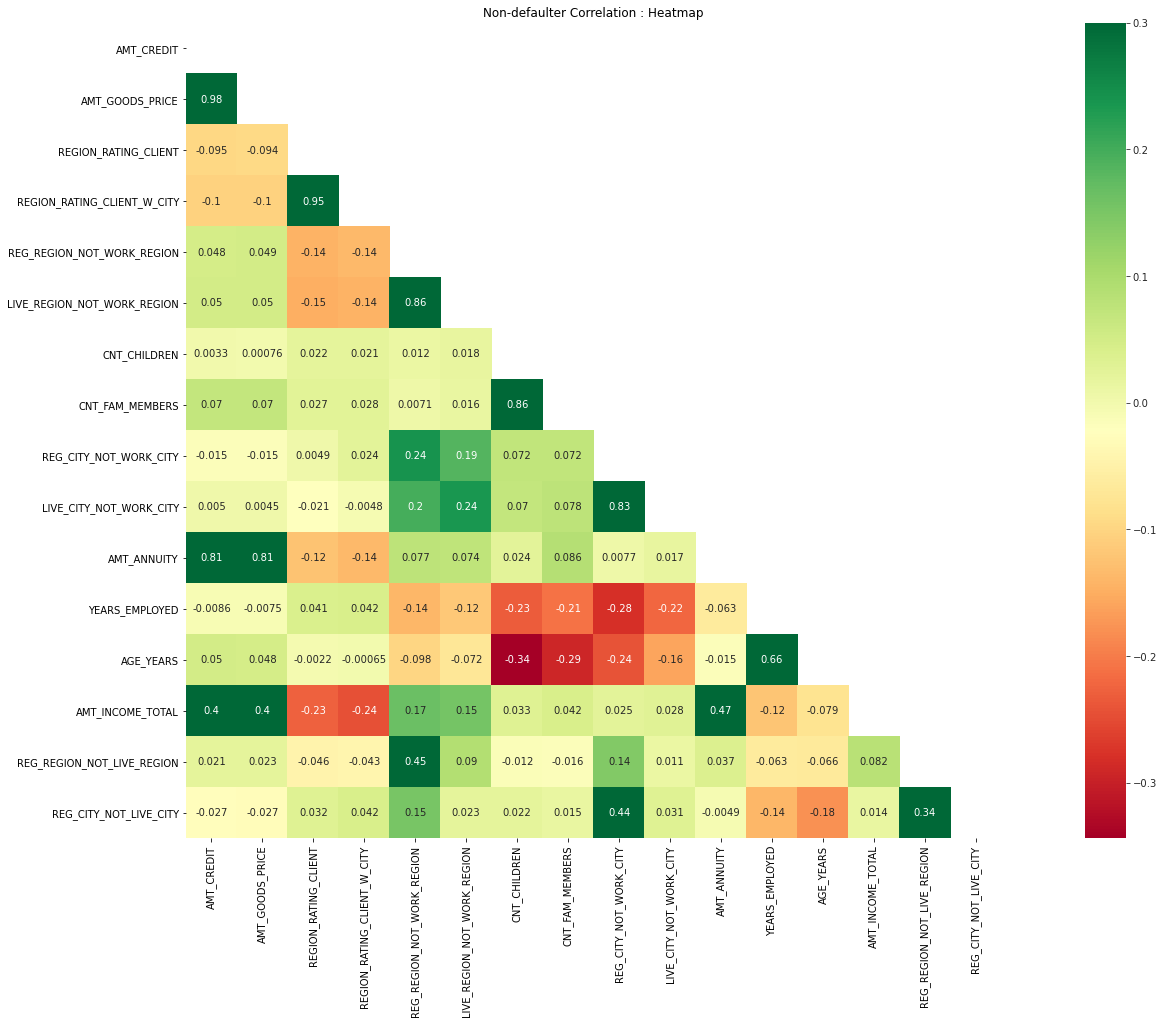

In [92]:
#Plotting heatmap for top correlations for target 0
top_corr_0 = ['AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION','CNT_CHILDREN','CNT_FAM_MEMBERS','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'AMT_ANNUITY','YEARS_EMPLOYED','AGE_YEARS','AMT_INCOME_TOTAL','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY']
corr = target_0[top_corr_0].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True,cmap="RdYlGn")
plt.title("Non-defaulter Correlation : Heatmap");

## Top 10 correlation for Target 1

In [93]:
correlation_for_target1 = target_1.corr().abs().unstack().drop_duplicates().sort_values(ascending=False).dropna()
correlation_for_target1 = correlation_for_target1[correlation_for_target1 !=1.0]
correlation_for_target1.head(10)

AMT_CREDIT                  AMT_GOODS_PRICE               0.9810
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.9565
CNT_CHILDREN                CNT_FAM_MEMBERS               0.8589
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.8480
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       0.7783
AMT_ANNUITY                 AMT_GOODS_PRICE               0.7777
AMT_CREDIT                  AMT_ANNUITY                   0.7753
AGE_YEARS                   YEARS_EMPLOYED                0.6145
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.4978
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY        0.4723
dtype: float64

## Top 10 correlation for default client

> * #### AMT_CREDIT                  AMT_GOODS_PRICE               0.9810
> * #### REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY   0.9565
> * #### CNT_CHILDREN                CNT_FAM_MEMBERS               0.8589
> * #### REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION   0.8480
> * #### REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY       0.7783
> * #### AMT_ANNUITY                 AMT_GOODS_PRICE               0.7777
> * #### AMT_CREDIT                  AMT_ANNUITY                   0.7753
> * #### AGE_YEARS                   YEARS_EMPLOYED                0.6159
> * #### REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION    0.4978
> * #### REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_WORK_CITY        0.4723

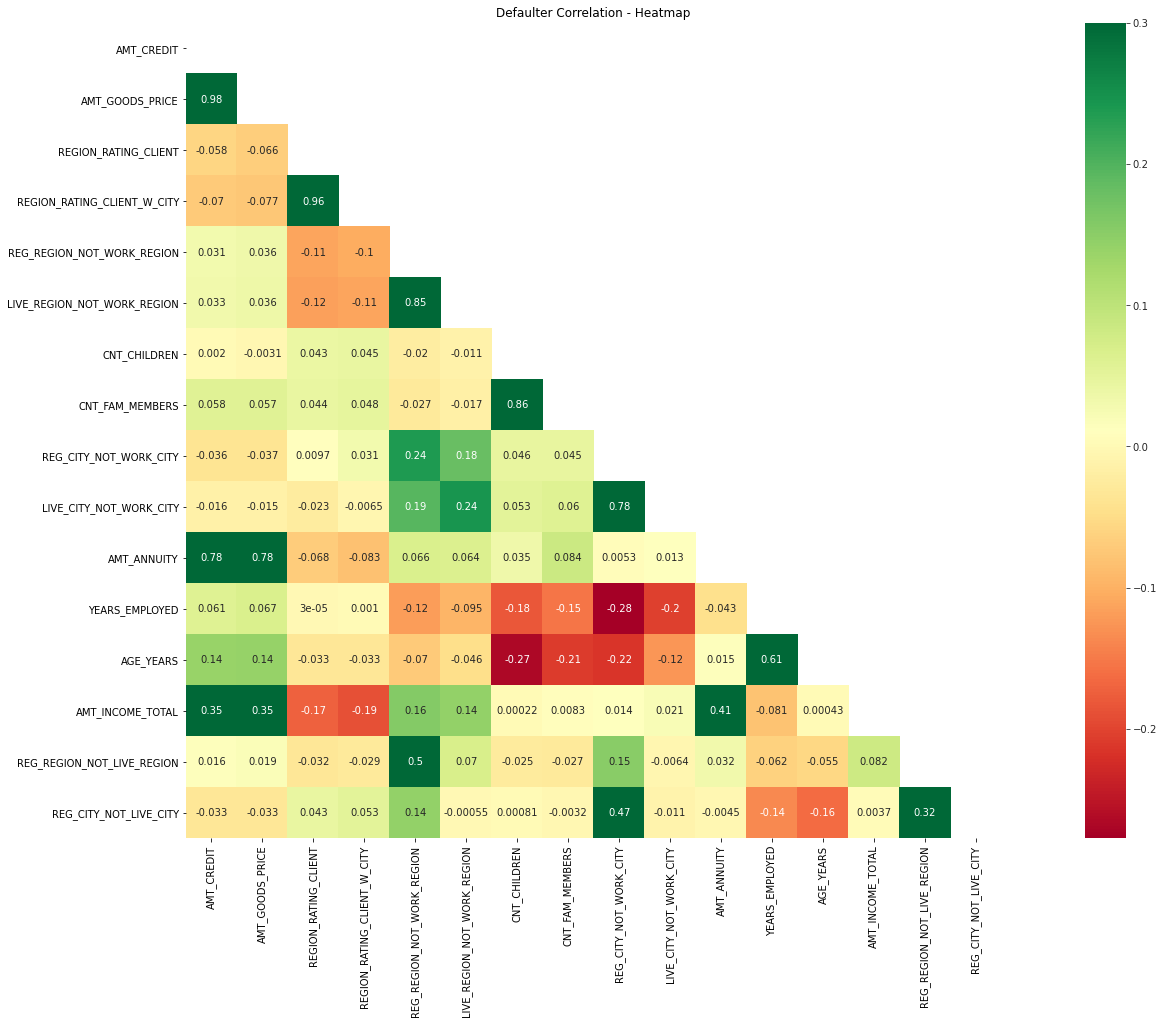

In [94]:
#Plotting heatmap for top correlations for target 1

top_corr_1 = ['AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION','CNT_CHILDREN','CNT_FAM_MEMBERS','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'AMT_ANNUITY','YEARS_EMPLOYED','AGE_YEARS','AMT_INCOME_TOTAL','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY']
corr = target_1[top_corr_1].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(30, 15))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True,cmap="RdYlGn")
plt.title("Defaulter Correlation - Heatmap");

### Observation : The variables with highest correlation in both target groups (1,0) is the same - AMT_CREDIT - AMT_GOODS_PRICE with 0.98

# Segmented analysis on variables with highest correlation

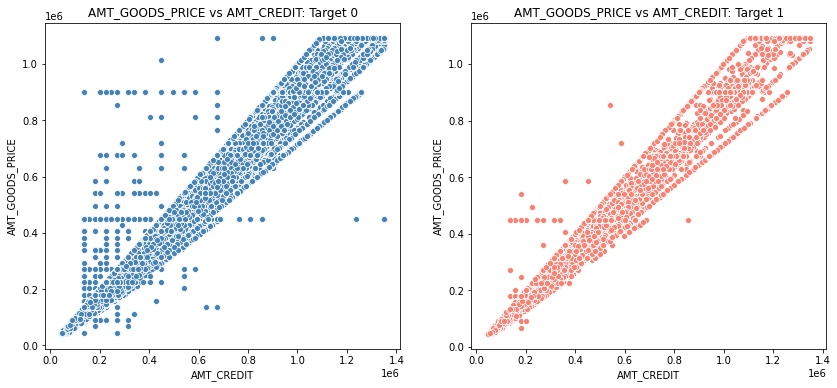

In [95]:
#Analysing the variables with highest correlation in both target groups
plt.figure(figsize =(14,6))


plt.subplot(1,2,1)
sns.scatterplot(data= target_0, x ="AMT_CREDIT", y ="AMT_GOODS_PRICE",color="steelblue");
plt.title("AMT_GOODS_PRICE vs AMT_CREDIT: Target 0")

plt.subplot(1,2,2)
sns.scatterplot(data= target_1, x ="AMT_CREDIT", y ="AMT_GOODS_PRICE",color="salmon");
plt.title("AMT_GOODS_PRICE vs AMT_CREDIT: Target 1")
plt.show()

<b>

We can see that Credit amount and price of the goods the loan was applied for have very high correlation. However, the number of defaulters is less for high goods price - which would be the collateral for their loan

</b>

## 11. Reading data for Previous applications data set

In [96]:
# READING PREVIOUS DATA SET
prev_appl= pd.read_csv("previous_application.csv")

In [97]:
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu


###  Analysing missing/null values

* Dealing with the missing values
   * Dropping the columns having missing values greater than 45 %
   * Replacing columns containing outliers with median to impute missing values
   * Dropped rows having 'XNA' and 'XAP' values for column NAME_CASH_LOAN_PURPOSE
  


In [98]:
rowcount = prev_appl.shape[0]

In [99]:
# checking for null values and percentage
nulls_prev = prev_appl.isna().sum()/rowcount * 100
nulls_prev = nulls_prev.sort_values(ascending = False)
nulls_prev

RATE_INTEREST_PRIVILEGED      99.6437
RATE_INTEREST_PRIMARY         99.6437
RATE_DOWN_PAYMENT             53.6365
AMT_DOWN_PAYMENT              53.6365
NAME_TYPE_SUITE               49.1198
DAYS_TERMINATION              40.2981
NFLAG_INSURED_ON_APPROVAL     40.2981
DAYS_FIRST_DRAWING            40.2981
DAYS_FIRST_DUE                40.2981
DAYS_LAST_DUE_1ST_VERSION     40.2981
DAYS_LAST_DUE                 40.2981
AMT_GOODS_PRICE               23.0818
AMT_ANNUITY                   22.2867
CNT_PAYMENT                   22.2864
PRODUCT_COMBINATION            0.0207
AMT_CREDIT                     0.0001
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
AMT_APPLICATION                0.0000
NAME_PAYMENT_TYPE              0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISIO

The first 4 columns contain more than 45% missing values. Especially the columns with 90% missing values will be of no help in our analysis. We can drop these columns

In [100]:
#list of columns having more than 45% missing values
nulls_above_45 = nulls_prev[nulls_prev > 45]

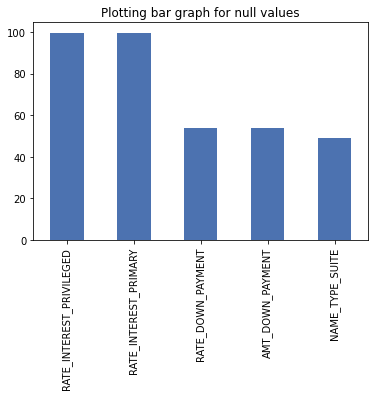

In [101]:
# plot bar graph for null values
nulls_prev[nulls_prev > 45].plot.bar();
plt.title("Plotting bar graph for null values");
plt.xticks(rotation=90);

In [102]:
#dropping columns with more than 45% missing values
prev_appl = prev_appl.drop(labels = nulls_above_45.index, axis = 1)
prev_appl.shape

(1670214, 32)

In [103]:
#dropping these values from the list of column labels containing null values
nulls_prev = nulls_prev[(nulls_prev<45) & (nulls_prev>0)]
nulls_prev

DAYS_TERMINATION            40.2981
NFLAG_INSURED_ON_APPROVAL   40.2981
DAYS_FIRST_DRAWING          40.2981
DAYS_FIRST_DUE              40.2981
DAYS_LAST_DUE_1ST_VERSION   40.2981
DAYS_LAST_DUE               40.2981
AMT_GOODS_PRICE             23.0818
AMT_ANNUITY                 22.2867
CNT_PAYMENT                 22.2864
PRODUCT_COMBINATION          0.0207
AMT_CREDIT                   0.0001
dtype: float64

In [104]:
col_tocheck = nulls_prev.index

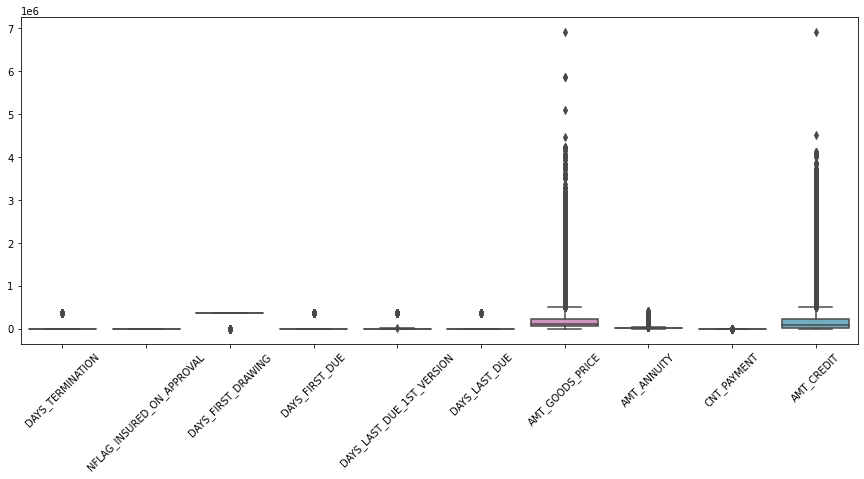

In [105]:
# checking for outliers to decide for missing value treatment
plt.figure(figsize=(15,6));
sns.boxplot(data = prev_appl[col_tocheck])
plt.xticks(rotation = 45);

#### For columns containing outliers, we will use median to impute missing values

In [106]:
col_median = ['DAYS_TERMINATION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'AMT_GOODS_PRICE','CNT_PAYMENT','AMT_CREDIT']
for i in col_median:
    print(prev_appl[i].isna().sum())
    prev_appl[i].fillna(prev_appl[i].median(),inplace=True)
    print(prev_appl[i].isna().sum())

673065
0
673065
0
673065
0
673065
0
673065
0
385515
0
372230
0
1
0


In [107]:
#Handling missing values for the column NFLAG_INSURED_ON_APPROVAL
prev_appl.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0000    665527
1.0000    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [108]:
prev_appl.NFLAG_INSURED_ON_APPROVAL.isna().sum()/prev_appl.shape[0]

0.40298129461254667

#### Since this is a boolean factor, we could replace with a value 'Unknown'. But leaving it at NaN makes further calculations simpler and all statistical functions ignore it automatically. So we can keep it Nan.

In [109]:
#handling missing value in PRODUCT_COMBINATION - categorical variable
prev_appl['PRODUCT_COMBINATION'].fillna(prev_appl['PRODUCT_COMBINATION'].mode()[0],inplace=True)
prev_appl['PRODUCT_COMBINATION'].isna().sum()

0

In [110]:
#Handling missing values for AMT_CREDIT - the amount of missing value is 0.0001, we can drop these
prev_appl = prev_appl[~prev_appl['AMT_CREDIT'].isna()]
prev_appl['AMT_CREDIT'].isna().sum()

0

In [111]:
cat_variables = list(set(prev_appl.columns) - set(prev_appl.describe().columns))

In [112]:
for i in cat_variables:
    print(prev_appl[i].value_counts(normalize=True))

Approved       0.6207
Canceled       0.1894
Refused        0.1740
Unused offer   0.0158
Name: NAME_CONTRACT_STATUS, dtype: float64
XNA       0.6368
x-sell    0.2732
walk-in   0.0900
Name: NAME_PRODUCT_TYPE, dtype: float64
Cash through the bank                       0.6188
XNA                                         0.3756
Non-cash from your account                  0.0049
Cashless from the account of the employer   0.0006
Name: NAME_PAYMENT_TYPE, dtype: float64
POS     0.4137
Cash    0.2763
XNA     0.2229
Cards   0.0868
Cars    0.0003
Name: NAME_PORTFOLIO, dtype: float64
XNA                    0.5123
Consumer electronics   0.2385
Connectivity           0.1653
Furniture              0.0346
Construction           0.0178
Clothing               0.0143
Industry               0.0115
Auto technology        0.0030
Jewelry                0.0016
MLM partners           0.0007
Tourism                0.0003
Name: NAME_SELLER_INDUSTRY, dtype: float64
Cash loans        0.4476
Consumer loans    0.4366

#### We see values like XNA and XAP which are missing values. Dropping these rows

In [113]:
print(prev_appl.shape)
prev_appl = prev_appl[prev_appl['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
prev_appl = prev_appl[prev_appl['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
prev_appl.shape

(1670214, 32)


(69635, 32)

In [114]:
# Merging current and previous application dataset with innerjoin
new_aftermerge= appl_data.merge(prev_appl, left_on='SK_ID_CURR',right_on='SK_ID_CURR', how='inner')

In [115]:
new_aftermerge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_R

In [116]:
# renaming common columns accordingly
new_aftermerge = new_aftermerge.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                                        'AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE',
                         'AMT_CREDIT_y':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'},axis=1)

In [117]:
#dropping unwanted columns

new_aftermerge.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                      'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START_PREV',
 'FLAG_CONT_MOBILE', 'REGION_RATING_CLIENT','NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA'],axis=1,inplace=True)

In [118]:
new_aftermerge.shape

(59318, 66)

In [119]:
new_aftermerge['TARGET'].value_counts()

0    51587
1     7731
Name: TARGET, dtype: int64

### Segregating the data on Target = 0 and Target = 1

In [120]:
newtarget_0 = new_aftermerge.loc[new_aftermerge['TARGET']==0]
newtarget_1 = new_aftermerge.loc[new_aftermerge['TARGET']==1]
print(newtarget_0.shape)
print(newtarget_1.shape)

(51587, 66)
(7731, 66)


## 12 Segmented univariate analysis after merging datasets

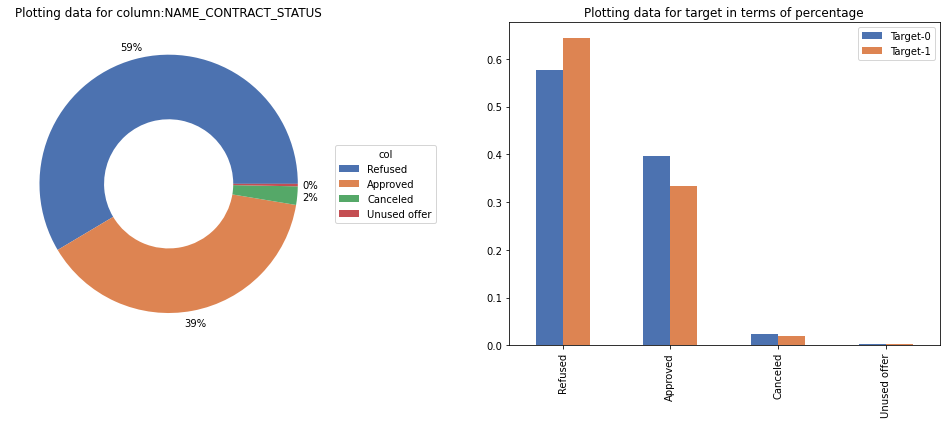

In [121]:
plotting_pie_perc(new_aftermerge,newtarget_0,newtarget_1,"NAME_CONTRACT_STATUS")

<b>

- The number of defaulters is among applicants who have been rejected previously
- People whose applications were previously approved are more likely to pay on time

</b>


## 13 Bivariate Analysis after merging datasets

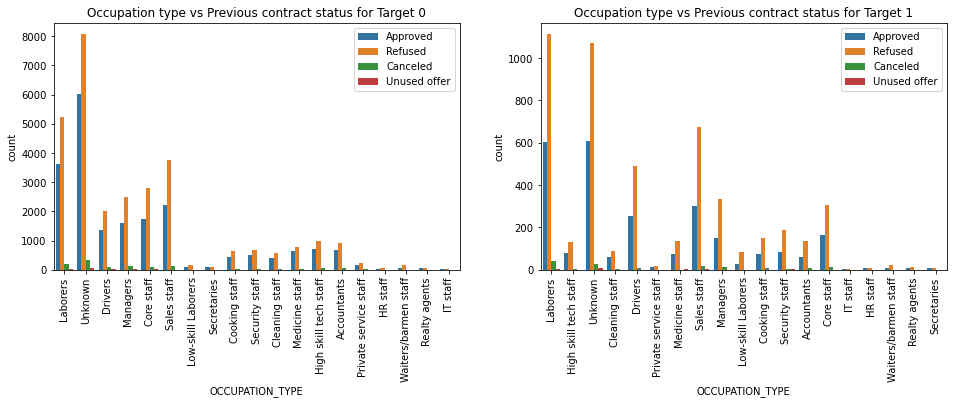

In [122]:
# countplot for occupation type vs previous application status
fig = plt.figure(figsize=[16,10])
hue_order = newtarget_0['NAME_CONTRACT_STATUS'].unique()

plt.subplot (2,2,1)
sns.countplot(x='OCCUPATION_TYPE', hue='NAME_CONTRACT_STATUS', hue_order=hue_order,data=newtarget_0,palette="tab10")
plt.xticks(rotation = 90)
plt.legend(loc=1)
plt.title("Occupation type vs Previous contract status for Target 0")

plt.subplot (2,2,2)
sns.countplot(x='OCCUPATION_TYPE', hue='NAME_CONTRACT_STATUS', hue_order=hue_order,data=newtarget_1,palette="tab10")
plt.xticks(rotation = 90)
plt.legend(loc=1)
plt.title("Occupation type vs Previous contract status for Target 1")


plt.show()


<b>

The rejection rate is high among the occupations like Laborers, Drivers and Sales staff in the defaulters group. Banks should avoid these categories especially if their applications have been rejected previously.

</b>

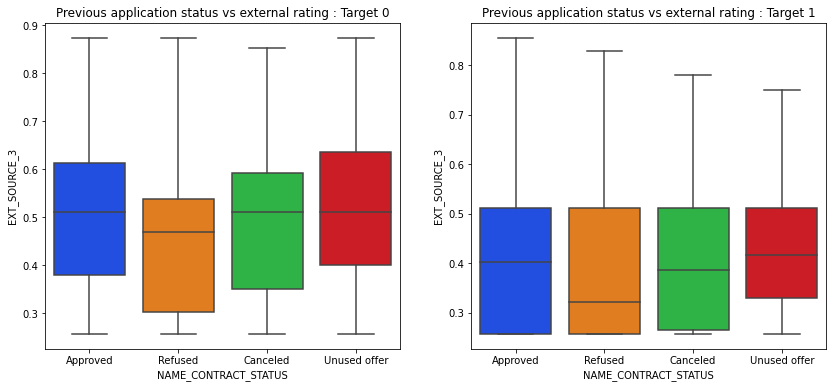

In [123]:
# box plot Previous application status vs external rating
plt.figure(figsize=(14,6))

order = newtarget_0["NAME_CONTRACT_STATUS"].unique()

plt.subplot(1,2,1)
sns.boxplot(newtarget_0["NAME_CONTRACT_STATUS"],newtarget_0["EXT_SOURCE_3"],order=order,palette="bright");
plt.title("Previous application status vs external rating : Target 0")

plt.subplot(1,2,2)
sns.boxplot(newtarget_1["NAME_CONTRACT_STATUS"],newtarget_1["EXT_SOURCE_3"],order=order,palette="bright");
plt.title("Previous application status vs external rating : Target 1")
plt.show()

<b>

- Applicants who have been previously refused/cancelled and have low external rating have a higher default risk
- Applicants whose loans have been previously approved and have higher external rating are more punctual in making their payments on time.

</b>

## 14. Multivariate analysis on merged data set

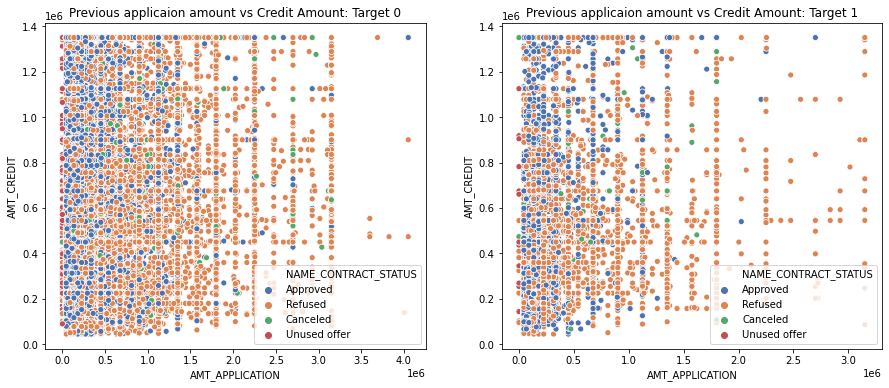

In [124]:
# Scatter plot Previous applicaion amount vs Credit Amount with previous application status
plt.figure(figsize=(15,6));

plt.subplot(1,2,1)
sns.scatterplot(newtarget_0['AMT_APPLICATION'],new_aftermerge['AMT_CREDIT'],hue=new_aftermerge["NAME_CONTRACT_STATUS"]);
plt.title("Previous applicaion amount vs Credit Amount: Target 0")



plt.subplot(1,2,2)
sns.scatterplot(newtarget_1['AMT_APPLICATION'],new_aftermerge['AMT_CREDIT'],hue=new_aftermerge["NAME_CONTRACT_STATUS"]);
plt.title("Previous applicaion amount vs Credit Amount: Target 1");




<b>
    
   - Banks should avoid giving loans to applicants who were previously rejected and had applied for high amounts of loan.
   - People whose applications were previously approved for high amount are more likely to make payments on time since we see very few occurances of such cases in target 0 group and slightly higher in target 1 group
    
</b>